# [1] 서론

### 1) 분석 목적 & 내용

* "[포스트 코로나] 포스트(Post, 이후)와 코로나19의 합성어로, 코로나19 극복 이후 다가올 새로운 시대·상황을 이르는 말이다."

* (출처: https://terms.naver.com/entry.nhn?docId=5958900&cid=43667&categoryId=43667)



* 본격적인 분석에 앞서, 포스트 코로나 시대의 정의를 파악해 보았습니다. 위의 정의를 다시 말하자면, 코로나 19 바이러스의 등장으로 인해 바뀐 사회를 포스트 코로나 시대라고 할 수 있습니다. 사회의 어떤 부분들이 변화하였는지를 파악하기 위해 다양한 데이터들을 사용하였습니다. 

* 이를 통해, 코로나 바이러스의 확산에 따른 소비 문화의 패턴을 파악해보고자 하였습니다. 코로나가 장기화될 것으로 예상되는 현 시점에서, 사람들의 소비 패턴을 파악하는 것은 침체된 한국 경제를 살리고, 관련 정책을 수립하는 데에 도움이 될 것으로 예측됩니다. 


### 2) 목차 & 사용한 데이터

#### 1. 목차

[1] 서론
 * 1) 분석 목적 & 내용
 * 2) 목차 & 사용한 데이터
 * 3) 분석을 위한 준비

[2] 본론 

[2] 본론1 
 * 1) 전국의 집단감염 정도 시각화 
 * 2) 집단감염 사례 빈도 시각화 
 * 3) 집단감염이 코로나 확산에 미치는 영향

[2] 본론 2 
 * 1) 각 시/도의 배달 시각화 
 * 2) 일상적 식사 메뉴의 배달 증가율 
 * 3) 각 구역 별 배달 건수와 코로나 확진자 수의 관계
 * 4) 포스트 코로나 시대, 배달에 걸리는 시간의 변화

[2] 본론 3 
 * 1) 날짜별 매출건수, 매출액 변화
 * 2) 서울시 각 생활권의 날짜 별 매출 건수, 매출액 변화
 * 3) 매출 건수 상위 10개 업종의 날짜 별 매출 건수, 매출액 변화 

[2] 본론 4 
 * 1) 월 별, 품목 별(중분류) 소비 지수의 변화 파악
 * 2) 2020년 2월 이후 각 품목 별 소비지수 시각화

[3] 결론
 * 1) 최종 insight
 * 2) 한계점 및 보완점 제시
 
 
 #### 2. 사용한 데이터 목록
 
 * PatientInfo.csv
 * Case.csv
 * delivery.csv
 * TimeProvince.csv
 * card.csv
 * adstrd_master.csv
 * index.csv
 * Policy.csv

### 3) 분석을 위한 준비

In [136]:
# 라이브러리
library('ggmap')
library(ggplot2)
library(lubridate)
library(tidyverse)
library(jpeg)

# 대용량 데이터를 위한 메모리 용량 확보
memory.limit(size = NA)
memory.size(max = F)
memory.limit(size = 40000)
memory.limit(size = NA)

[1] 40000

[1] 6961.35

[1] 40000

[1] 40000

---

# [2] 본론

## [2] 본론 1 : patientinfo, case 데이터 

#### 해당 데이터 불러오기

In [137]:
patient_info <- read_csv('C:\\Users\\uccoo\\Desktop\\KT_data\\COVID_19\\PatientInfo.csv')
Case <- read_csv('C:\\Users\\uccoo\\Desktop\\KT_data\\COVID_19\\Case.csv')

Parsed with column specification:
cols(
  patient_id = col_double(),
  sex = col_character(),
  age = col_character(),
  country = col_character(),
  province = col_character(),
  city = col_character(),
  infection_case = col_character(),
  infected_by = col_double(),
  contact_number = col_double(),
  symptom_onset_date = col_date(format = ""),
  confirmed_date = col_date(format = ""),
  released_date = col_date(format = ""),
  deceased_date = col_logical(),
  state = col_character()
)
Warning message:
"67 parsing failures.
 row           col           expected     actual                                                            file
1469 deceased_date 1/0/T/F/TRUE/FALSE 2020-02-23 'C:\Users\uccoo\Desktop\KT_data\COVID_19\PatientInfo.csv'
1508 deceased_date 1/0/T/F/TRUE/FALSE 2020-02-26 'C:\Users\uccoo\Desktop\KT_data\COVID_19\PatientInfo.csv'
1509 deceased_date 1/0/T/F/TRUE/FALSE 2020-03-02 'C:\Users\uccoo\Desktop\KT_data\COVID_19\PatientInfo.csv'
1510 deceased_date 1/0/T/F/TRUE/FA

* 집단 감염과 관련된 항목을 포함하고 있는 PatientInfo 데이터와 Case 데이터를 불러 왔습니다.

* 코로나의 전국적 확산은 집단감염으로부터 시작되었다고 볼 수 있습니다. 밀집된 장소에서 코로나 감염이 쉽기도 하고 수많은 확진자의 동선을 파악하기도 어려워 지역사회로의 감염을 막기 힘듭니다. 저희는 이러한 집단감염의 전국적 상황을 살펴보고 집단감염이 코로나 확산에 미치는 구체적 영향을 알아보았습니다.

### 1) 전국의 집단감염 정도 시각화

In [138]:
# 한국의 지도를 가져 옴
south_korea <- map_data('world', region = 'South Korea')
head(south_korea, 3)
str(south_korea)

long,lat,group,order,region,subregion
126.3270,33.22363,1,1,South Korea,Cheju Do
126.2820,33.20151,1,2,South Korea,Cheju Do
126.2402,33.21484,1,3,South Korea,Cheju Do


'data.frame':	260 obs. of  6 variables:
 $ long     : num  126 126 126 126 126 ...
 $ lat      : num  33.2 33.2 33.2 33.2 33.3 ...
 $ group    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ region   : chr  "South Korea" "South Korea" "South Korea" "South Korea" ...
 $ subregion: chr  "Cheju Do" "Cheju Do" "Cheju Do" "Cheju Do" ...


* 우선, 한국에서 집단 감염이 많이 일어난 지역을 알아보기 위해 지도를 불러내어 시각화하였습니다. 

In [139]:
# "타도시"로뷰터 유입되어 위도 경도를 알수 없는 경우를 제외한 그룹 데이터
Case_group <- Case[Case$group == "TRUE",] %>% filter(latitude != '-')
str(Case_group)
table(Case_group$latitude)


tibble [65 x 8] (S3: tbl_df/tbl/data.frame)
 $ case_id       : num [1:65] 1e+06 1e+06 1e+06 1e+06 1e+06 ...
 $ province      : chr [1:65] "서울" "서울" "서울" "서울" ...
 $ city          : chr [1:65] "용산구" "관악구" "구로구" "양천구" ...
 $ group         : logi [1:65] TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ infection_case: chr [1:65] "Itaewon Clubs" "Richway" "Guro-gu Call Center" "Yangcheon Table Tennis Club" ...
 $ confirmed     : num [1:65] 139 119 95 43 43 41 17 30 14 13 ...
 $ latitude      : chr [1:65] "37.538621" "37.48208" "37.508163" "37.546061" ...
 $ longitude     : chr [1:65] "126.992652" "126.901384" "126.884387" "126.874209" ...



 35.078825  35.136035  35.164845   35.16708   35.17371   35.20599   35.21628 
         1          1          1          1          1          1          1 
  35.22115  35.338811   35.54127   35.64887   35.68556  35.782149  35.805681 
         1          1          1          1          1          1          1 
  35.82558   35.84008   35.84819  35.857375  35.857393   35.88395  35.885592 
         1          1          1          1          1          1          1 
   36.0581 36.3398739 36.3400973  36.346869  36.358123   36.48025  36.504713 
         1          1          1          1          1          1          1 
 36.646845   36.81503   36.82422   36.92757  37.000354    37.2376  37.287356 
         1          1          1          1          1          1          1 
 37.342762  37.381784   37.38833  37.403722  37.455687  37.481059  37.481735 
         1          1          1          1          1          1          1 
  37.48208  37.486837   37.48825  37.498279  37.508163  37.5208

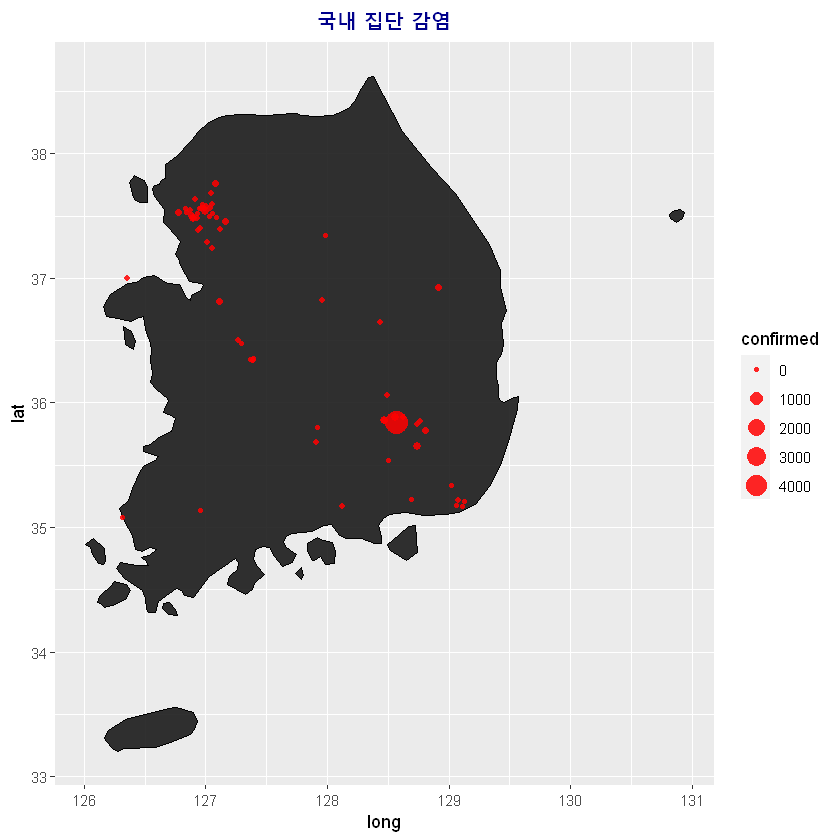

In [140]:
# chr 로 저장된 위도와 경도를 수치 데이터로 바꿔 줌 
Case_group$latitude <- as.numeric(Case_group$latitude)
Case_group$longitude <- as.numeric(Case_group$longitude)

# 집단 감염 산점도를 한국 지도 위에 그림 
p1 <- ggplot() + 
geom_polygon(data = south_korea, aes(x=long, y=lat, group=group),fill = '#222222EE', colour="black") + 
scale_fill_brewer(palette="Set1")+
geom_point(data = Case_group, mapping = aes(x = longitude, y = latitude, size = confirmed), shape = 16, color = "red", alpha = 0.85) +
ggtitle("국내 집단 감염") +
theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 15, color = "darkblue")) 

p1

* Case 데이터에서 위도와 경도를 이용하여 지도에 표시하기 위해 타도시로부터 유입되어 위도, 경도를 알 수 없는 경우를 제외한 그룹 데이터를 case_group 오브젝트에 저장하였습니다. 하지만 case_group의 위도와 경도의 데이터 타입이 chr이기 때문에 지도 데이터와의 병합이 불가능하여 이를 수치 데이터 타입으로 변환하였습니다. 그 후 , 집단 감염 산점도를 한국 지도 위에 그려주었습니다. 
* 위 그림을 통해, 저희는 대구를 비롯한 경상북도 지역과 수도권 지역에서 집단 감염이 상대적으로 많이 발생했음을 알 수 있었습니다.

### 2) 집단감염 사례 빈도 시각화

In [6]:
# infection_case 결측치 제거
head(patient_info,3)
summary(patient_info$infection_case)
nrow(patient_info)
patient_info1 <- patient_info %>% filter(!is.na(infection_case))
nrow(patient_info1)

patient_info2 <- patient_info1 %>% arrange(desc(contact_number))# 처음 2 개의 데이터는 데이터 입력 오류로 판단됨 -> 삭제
find_error1 <- patient_info2 %>% head()
find_error1$contact_number
patient_info3 <- patient_info2[-c(1,2),]

patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
1e+09,male,50s,Korea,서울,강서구,overseas inflow,NA,75,2020-01-22,2020-01-23,2020-02-05,NA,released
1e+09,male,30s,Korea,서울,중랑구,overseas inflow,NA,31,NA,2020-01-30,2020-03-02,NA,released
1e+09,male,50s,Korea,서울,종로구,contact with patient,2.002e+09,17,NA,2020-01-30,2020-02-19,NA,released


   Length     Class      Mode 
     5164 character character 

[1] 5164

[1] 4245

[1] 1160 1091  485  450  422  296

* 다음으로, 대표적인 infection_case가 무엇인지 알아보고자 하였습니다. 이를 위해 infection_case를 알 수 없거나, contact_number가 비정상적으로 많아서 데이터 입력 오류가 의심되는 항목을 삭제하였습니다. 

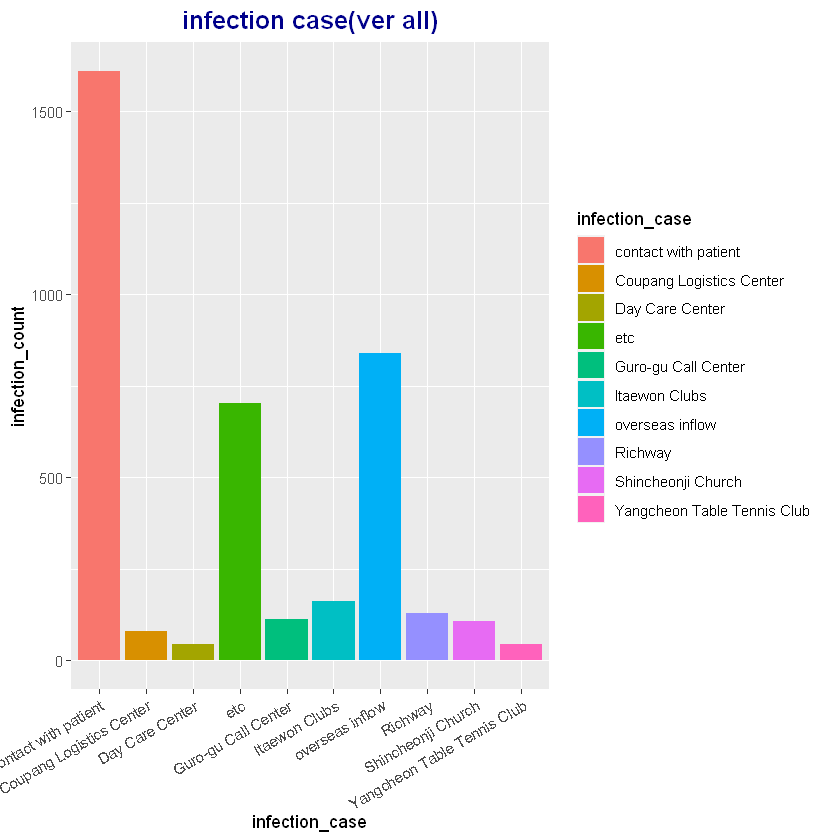

In [7]:
# infection case 같은 것끼리 묶고 top 10 시각화
patient_info4 <- patient_info3 %>% group_by(infection_case) %>% summarize(infection_count = n()) %>% arrange(desc(infection_count))

# 전체 infection case
p2 <- ggplot(data = patient_info4[1:10,]) + 
geom_bar(mapping = aes(x = infection_case, y = infection_count, fill = infection_case), stat = "identity") + 
ggtitle("infection case(ver all)") +
theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 15, color = "darkblue"))+
theme(axis.text.x = element_text(angle = 30, hjust = 1))
p2

* 전체 case 데이터에서 infection_case 중 가장 빈도가 높은 열 개의 infection_case를 뽑아 시각화 하였습니다. 그 결과, 집단 감염이 아닌 case들이 과반수 이상을 차지하여, 이를 제거하고 다시 시각화하였습니다.

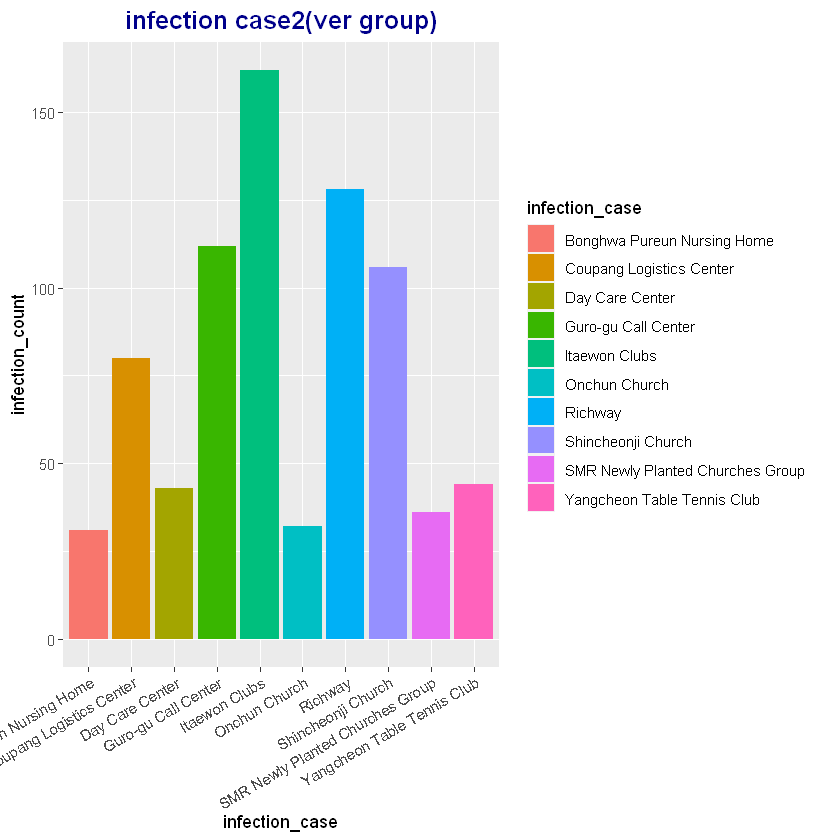

In [8]:
# 집단 감염 infection case
p3 <- ggplot(data = patient_info4[4:13,]) + 
geom_bar(mapping = aes(x = infection_case, y = infection_count, fill = infection_case), stat = "identity") + 
ggtitle("infection case2(ver group)") +
theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 15, color = "darkblue"))+
theme(axis.text.x = element_text(angle = 30, hjust = 1))
p3

* 이태원 클럽, 온천 교회, 구로 콜센터, 신천지 교회에서의 집단 감염의 빈도가 가장 높음을 확인 할 수 있었습니다.

### 3) 집단감염이 코로나 확산에 미치는 영향

* 집단감염이 없었더라면 현재 코로나 확산의 추이가 어떻게 되었을지 알아보았습니다.

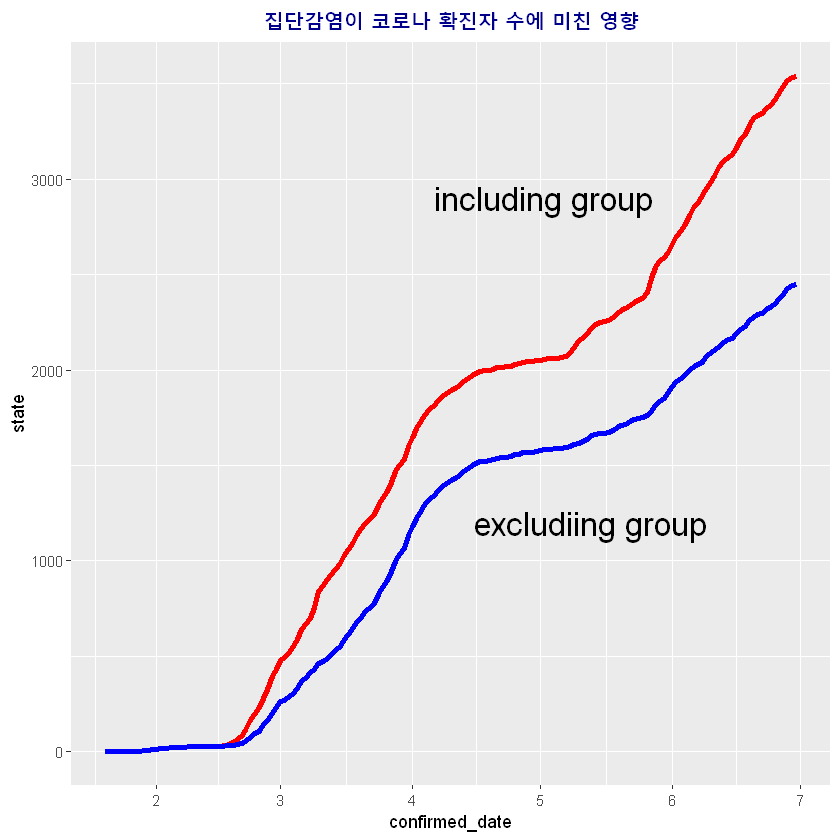

In [9]:
# 집단감염이 있을 경우와 없을 경우 감염자 추이 비교 (미분류 상태를 포함한 etc는 제거)

# 집단감염이 있는 경우 
time_infect <- patient_info3 %>% filter(infection_case != 'etc') %>% group_by(confirmed_date) %>% summarize(count = n())
time_infect$confirmed_date  <- as.Date(time_infect$confirmed_date)

# 집단감염 없이 해외유입(overseas inflow), 확진자와 접촉(contact with patient)만 있을 경우 
time_infect2 <- patient_info3 %>% filter(infection_case == 'overseas inflow' | infection_case == 'contact with patient') %>% group_by(confirmed_date) %>% summarize(count = n())
time_infect2$confirmed_date  <- as.Date(time_infect2$confirmed_date)

for_index1 <- time_infect2$confirmed_date[90]
for_index2 <- time_infect2$confirmed_date[100]

# 확진자 추이 비교 (빨강 - 집단감염 유, 파랑 - 집단감염 무)
p4 <- ggplot() +
geom_line(data = time_infect, mapping = aes(x = confirmed_date, y = cumsum(count)), color = "red", lwd = 1.5) +
labs(y = "state") +
geom_line(data = time_infect2, mapping = aes(x = confirmed_date, y = cumsum(count)), color = "blue", lwd = 1.5) +
ggtitle("집단감염이 코로나 확진자 수에 미친 영향") + 
theme(plot.title = element_text( face = "bold", hjust = 0.5, size = 15, color = "darkblue"))+
labs(y = "state") +
annotate("text", x=for_index1 , y=2900, label="including group", size=7) +
annotate("text", x=for_index2 , y=1200, label="excludiing group", size=7) 
p4

* 마지막으로 집단 감염이 없었더라면, 다시 말해 사람들이 사회적 거리두기를 철저히 지켰을 경우의 코로나 확진자 수의 양상을 현재의 코로나 확진자 수의 양상과 비교해 보았습니다. 빨간색 선은 현재의 누적 코로나 확진자 수를 시각화한 것이며, 파란색 선은 집단 감염이 없었다고 가정할 때의 누적 코로나 확진자 수를 시각화한 것입니다. 두 그래프 사이의 간격이 점점 벌어지는 것을 통해, 사회적 거리두기의 중요성을 확인할 수 있었습니다.

---

## [2] 본론 2 : delivery, timeproivince 데이터

#### 해당 데이터 불러오기

In [10]:
# delivery data, time province data
del <- read_csv('C:\\Users\\uccoo\\Desktop\\KT_data\\delivery.csv')
t.pro <- read_csv('C:\\Users\\uccoo\\Desktop\\KT_data\\COVID_19\\TimeProvince.csv')

Parsed with column specification:
cols(
  .default = col_character(),
  SERIAL_NUMBER = col_double(),
  PROCESS_DT = col_date(format = ""),
  DLVR_REQUST_STTUS_VALUE = col_double(),
  DLVR_STORE_LEGALDONG_CODE = col_double(),
  DLVR_STORE_ADSTRD_CODE = col_double(),
  DLVR_STORE_RDNMADR_CODE = col_double(),
  DLVR_DSTN_LEGALDONG_CODE = col_double(),
  DLVR_DSTN_ADSTRD_CODE = col_double(),
  DLVR_DSTN_RDNMADR_CODE = col_double(),
  DLVR_AMOUNT = col_double(),
  CALL_RLAY_FEE_AMOUNT = col_double(),
  GOODS_AMOUNT = col_double(),
  SETLE_KND_VALUE = col_double(),
  DLVR_RCEPT_TIME = col_datetime(format = ""),
  DLVR_CARALC_TIME = col_datetime(format = ""),
  DLVR_COMPT_TIME = col_datetime(format = ""),
  DLVR_CANCL_TIME = col_datetime(format = "")
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  date = col_date(format = ""),
  time = col_double(),
  province = col_character(),
  confirmed = col_double(),
  released = col_double(),
  deceased = col_

* 먼저 필요한 데이터를 불러왔습니다.

* 코로나 확산을 예방하기 위한 사회적 거리두기의 중요성이 크게 다가오면서 외출을 최대한 자제하는 사회 분위기가 형성되었습니다. 
* 저희는 이러한 외출 감소 양상을 가장 잘 설명할 수 있는 데이터가 'delivery' 데이터라고 생각했습니다. 외식을 자제하고 집에서 배달을 통해 식사를 해결하는 경우가 많아질 것으로 예상해 'delivery' 데이터를 살펴보았습니다.

### 1)  각 시도의 배달 시각화

* 먼저 각 시도의 일일 배달량을 시각화 해보았습니다.

In [11]:
subset(del, DLVR_REQUST_STTUS_VALUE != 1 & DLVR_REQUST_STTUS_VALUE != 2)

# 배달 완료 상태만 추출 
del.com <- subset(del, DLVR_REQUST_STTUS_VALUE == 1)

SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
6094477,2020-02-16,C000039,3,NA,S0000360,카페/디저트,1162010100,서울특별시,관악구,...,D0000009,3800,0,16900,2,NA,2020-02-16 11:19:14,NA,NA,2020-02-16 12:04:48
6524364,2020-02-28,C000040,4,NA,S0001980,카페/디저트,1141012000,서울특별시,서대문구,...,D0000009,3700,0,20900,2,NA,2020-02-28 13:56:05,NA,NA,2020-02-28 13:58:50
6560539,2020-02-29,C000028,4,NA,S0031787,배달전문업체,4115010400,경기도,의정부시,...,D0000009,5000,0,18500,2,NA,2020-02-29 03:53:17,2020-02-29 03:58:48,NA,2020-02-29 04:01:23
7851423,2020-04-03,C000032,3,NA,S0000642,카페/디저트,1159010200,서울특별시,동작구,...,D0000009,3400,0,26500,2,NA,2020-04-03 20:29:53,NA,NA,2020-04-03 20:32:23


* 배달 상태는 완료, 취소, 사고, 문의로 4가지의 상태가 있었는데요, 저희는 데이터 분석을 위해 배달 상태가 완료인 관측치만 남기고 그 외의 상태는 제거한 del.com 데이터를 생성했습니다.

In [12]:
# 시간에 따른 시/도 별 배달 건수
del.com.pro <- group_by(del.com,DLVR_STORE_SIDO, PROCESS_DT) %>% summarize(n = n())
head(del.com.pro, 10)

DLVR_STORE_SIDO,PROCESS_DT,n
강원도,2020-01-01,88
강원도,2020-01-02,40
강원도,2020-01-03,77
강원도,2020-01-04,84
강원도,2020-01-05,61
강원도,2020-01-06,96
강원도,2020-01-07,47
강원도,2020-01-08,35
강원도,2020-01-09,40
강원도,2020-01-10,53


* del.com 데이터를 처리해 각 시/도의 일일 배달량이 얼마인지 알 수 있도록 처리한 del.com.pro를 만들었습니다. 

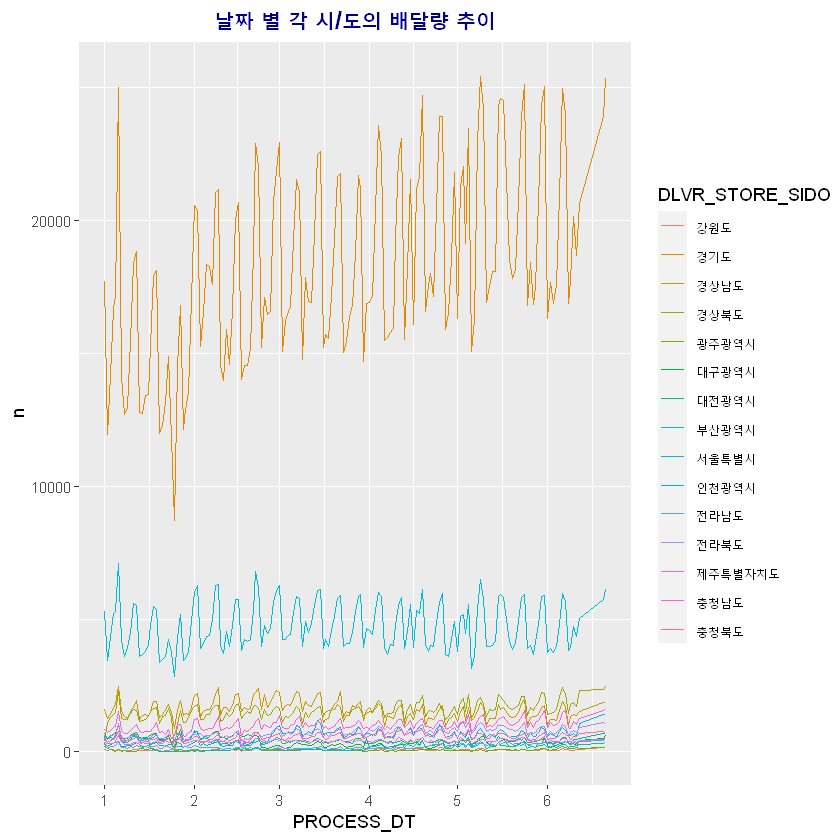

In [13]:
p5 <- ggplot() + geom_line(del.com.pro, mapping = aes(x = PROCESS_DT, y = n, color = DLVR_STORE_SIDO)) +
ggtitle("날짜 별 각 시/도의 배달량 추이") +
theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 15, color = "darkblue"))
p5

* 각 시/도별 배달량의 증감양상을 알기 위해 해당 데이터를 사용해 시각화를 진행하였습니다. 하지만 인사이트를 도출할만한 그래프가 그려지지 않았는데요, 그 이유는 
* 1. 시/도별 인구수의 차이가 크기때문에 단순 일일 배달량 합계만 그려서는 인구가 적은 시/도의 그래프가 잘 보이지 않습니다.
* 2. 일일 배달량 합계이므로 주말과 평일의 배달량 차이까지 반영되어 그래프가 들쭉날쭉한 모양을 하고있습니다. 하지만 이는 코로나의 영향이 아닌 평일과 주말의 차이이므로 불필요하며 그래프의 전체적 양상을 보는데 방해가 됩니다.

* 그래서 저희는 이러한 문제점 해결을 위해 아래 두 가지 변경사항을 적용했습니다.
* 1. 배달량 측정 기준을 하루에서 한달로 변경 -> 월별 배달 양상
* 2. 시/도 별 인구수 차이로 인해 배달량 단순합계로 진행하지 않고 해당 시/도의 전체 배달량 중 각 월이 차지하는 비율을 통해 월별 배달 양상을 알아보기

In [14]:
# 월별 데이터 형성
del.com.month <- mutate(del.com, month = month(PROCESS_DT))

del.com.pro.1 <- del.com.month %>% group_by(DLVR_STORE_SIDO, month) %>% summarize(month_del = n()) %>% filter(month != 6)
total_del <- group_by(del.com.pro.1, DLVR_STORE_SIDO) %>% summarize(total_del = sum(month_del)) %>% select(DLVR_STORE_SIDO, total_del)
del.com.pro.2 <- merge(del.com.pro.1, total_del, key = 'DLVR_STORE_SIDO') %>% mutate(del_rate = month_del/total_del)
head(del.com.pro.2)

DLVR_STORE_SIDO,month,month_del,total_del,del_rate
강원도,1,1763,11482,0.1535447
강원도,2,2108,11482,0.1835917
강원도,3,2684,11482,0.2337572
강원도,4,2649,11482,0.2307089
강원도,5,2278,11482,0.1983975
경기도,1,458635,2729600,0.1680228


* 위에서 사용했던 del.com 데이터를 처리해 각 시/도의 월별 배달율을 반영한 del.com.pro.2를 만들었습니다. 이 때, 6월 데이터는 완전하지 않아서 6월 데이터는 제외하였습니다. 즉 해당 데이터를 통해 강원도 1월의 배달량은 강원도의 1월에서 5월까지의 전체 배달량 중 어느정도의 비율을 차지하는지 알 수 있습니다.

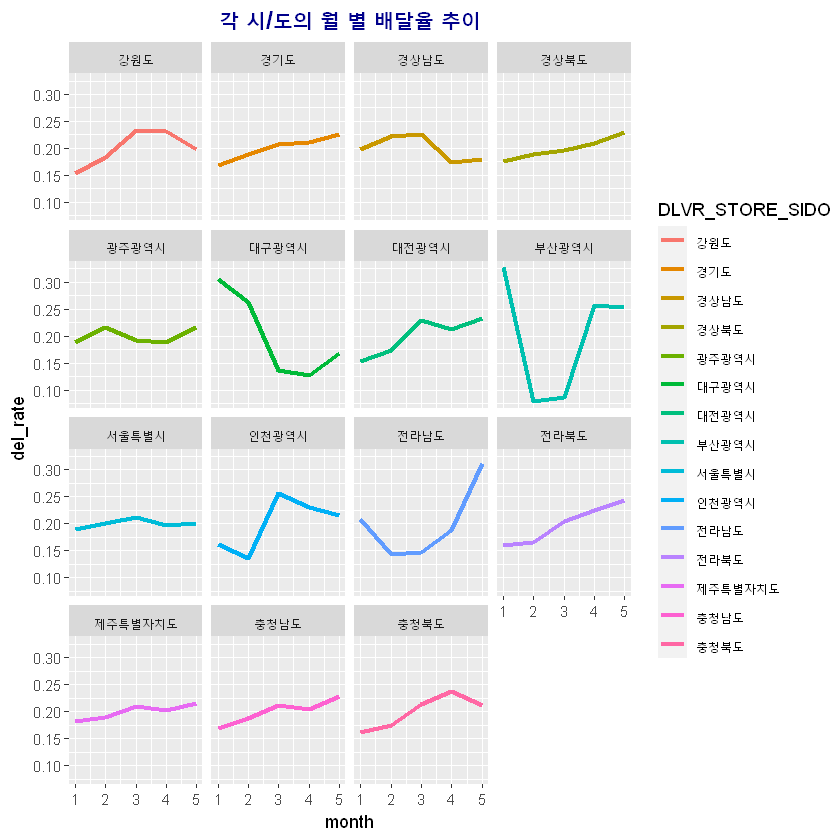

In [131]:
p6 <- ggplot(del.com.pro.2) + geom_line(mapping = aes(x = month, y = del_rate, color = DLVR_STORE_SIDO), lwd = 1.2) +
facet_wrap(~ DLVR_STORE_SIDO) +
ggtitle("각 시/도의 월 별 배달율 추이") +
theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 15, color = "darkblue"))
p6

* del.com.pro.2를 통해 시각화를 진행하였습니다. 대부분의 도시에서 우상향하는 그래프가 그려져 사회적 거리두기로 인해 배달이 증가하는 상황을 알 수 있었습니다. 

* 하지만 경상남도, 대구광역시, 부산광역시의 그래프는 우하향하는 그래프가 그려진 것을 확인할 수 있었습니다. 특히 대구광역시의 경우 2월 말에 발생한 신천지 교회 집단감염으로 인해 높은 강도의 사회적 거리두기가 시행되어 3월부터 배달율이 급증할 것으로 예상했지만, 이와 반대로 감소하는 양상을 보였습니다.

* 다른 시/도와 경향성이 다른 경상남도, 대구광역시, 부산광역시의 데이터만 따로 자세히 살펴보기로 하였습니다.

In [16]:
# 다른 시/도와 경향성이 다른 대구, 경상남도, 부산 확인 
# 코로나의 영향이 컸던 경상 북도 역시 확인
del.com.month <- mutate(del.com, month = month(PROCESS_DT))

gs <- c('대구광역시','부산광역시','경상남도', '경상북도')
del.com.gs <- subset(del.com.month, DLVR_STORE_SIDO %in% gs) %>% 
group_by(DLVR_STORE_SIDO, DLVR_STORE_INDUTY_NM, month) %>% summarize(month_del = n()) %>% filter(month != 6)
head(del.com.gs)

DLVR_STORE_SIDO,DLVR_STORE_INDUTY_NM,month,month_del
경상남도,도시락,1,1346
경상남도,도시락,2,1544
경상남도,도시락,3,1332
경상남도,도시락,4,643
경상남도,도시락,5,902
경상남도,돈까스/일식,1,1266


* 경상남도, 대구광역시, 부산광역시의 배달량을 월별, 배달 품목별로 나누어 살펴볼 수 있는 del.com.gs 데이터를 만들었으며, 비교를 위해 예상과 비슷한 배달양상을 보인 경상북도의 데이터 역시 포함시켰습니다.

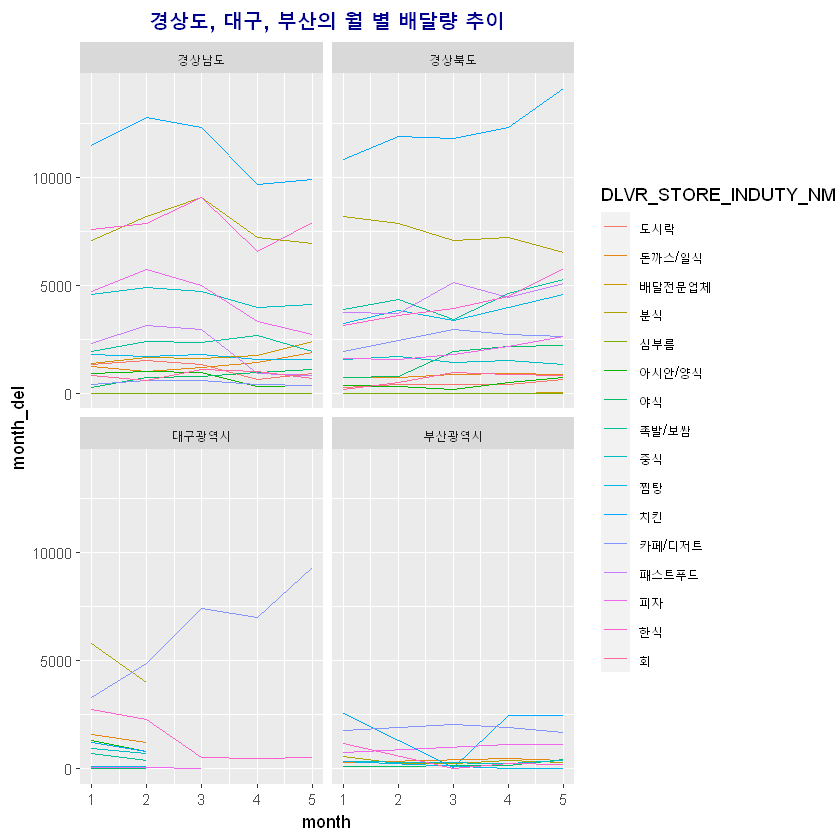

In [117]:
p7 <- ggplot(del.com.gs) + geom_line(mapping = aes(x = month, y = month_del, color = DLVR_STORE_INDUTY_NM)) +
facet_wrap( ~ DLVR_STORE_SIDO) +
ggtitle("경상도, 대구, 부산의 월 별 배달량 추이") +
theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 15, color = "darkblue"))
p7

* 해당 데이터로 그래프를 그려보니 대구광역시의 경우 카페/디저트와 한식 카테고리를 제외한 나머지 카테고리에서 중도절단이 일어났음을 확인할 수 있었습니다. 특히 3월에서 데이터의 누락이 시작된 경우가 많아 집단감염이 시작된 2월 말 이후의 양상을 분석하기에 적절하지 않은 데이터였습니다.
* 또한 부산광역시의 인구는 약 340만으로 약 330만의 인구를 가진 경상남도와 비슷한 수준이지만 나머지 세 개의 시/도보다 부산광역시의 배달량이 현저히 낮음을 볼 수 있습니다. 이를 통해 데이터의 누락을 의심해볼 수 있었습니다.

* 저희는 이러한 문제점을 해결하기 위해 시/도별로 배달을 살펴보기보다는 6개의 구역으로 나누어 살펴보기로 했습니다. 한 구역 내에서 특정 시/도의 데이터에 문제가 있더라도 구역 단위로 합쳐지게 되면 누락된 데이터의 영향이 최소화될 것이라고 생각했기때문입니다.

* 아래의 do_list를 보면 알 수 있듯이, 전국의 각 시/도를 인접한 구역끼리 묶어서 6개의 구역으로 나누어 분석을 진행하였습니다.

In [18]:
do_list <- list('수도권' = c('경기도','서울특별시','인천광역시'), '전라도' = c('전라남도','전라북도','광주광역시'),
               '경상도' = c('경상남도','경상북도','대구광역시','부산광역시'), '충청도' = c('대전광역시','충청남도','충청북도'))

del.com.month$DO <- NA
del.com.month$DO <- ifelse(del.com.month$DLVR_STORE_SIDO %in%  do_list$수도권, '수도권', del.com.month$DO)
del.com.month$DO <- ifelse(del.com.month$DLVR_STORE_SIDO %in%  do_list$전라도, '전라도', del.com.month$DO)
del.com.month$DO <- ifelse(del.com.month$DLVR_STORE_SIDO %in%  do_list$경상도, '경상도', del.com.month$DO)
del.com.month$DO <- ifelse(del.com.month$DLVR_STORE_SIDO %in%  do_list$충청도, '충청도', del.com.month$DO)
del.com.month$DO <- ifelse(del.com.month$DLVR_STORE_SIDO == '제주특별자치도', '제주도', del.com.month$DO)
del.com.month$DO <- ifelse(del.com.month$DLVR_STORE_SIDO == '강원도', '강원도', del.com.month$DO)
table(del.com.month$DO)


 강원도  경상도  수도권  전라도  제주도  충청도 
  12670  613988 3895348  165950   66968  320836 

* 먼저 각 시/도를 6개의 구역으로 합치는 작업을 진행했습니다. 도는 남도와 북도를 하나로 묶고 광역시의 경우 인접한 도와 하나의 구역으로 묶었습니다. 
* 시/도별 월별 배달 합계가 기록된 del.com.mont 데이터에 'DO'라는 새로운 변수를 만들어 각 시/도가 어느 구역에 해당되는지 나타냈습니다.

In [19]:
del.com.do <- del.com.month %>% group_by(DO, month) %>% summarize(month_del = n()) %>% filter(month != 6)
total_del <- group_by(del.com.do, DO) %>% summarize(total_del = sum(month_del)) %>% select(DO, total_del)
del.com.do.1 <- merge(del.com.do, total_del, key = 'DO') %>% mutate(del_rate = month_del/total_del)
head(del.com.do.1)

DO,month,month_del,total_del,del_rate
강원도,1,1763,11482,0.1535447
강원도,2,2108,11482,0.1835917
강원도,3,2684,11482,0.2337572
강원도,4,2649,11482,0.2307089
강원도,5,2278,11482,0.1983975
경상도,1,115107,559394,0.2057709


* 그 후 del.com.month 데이터를 구역별로 처리해 각 구역의 월별 배달율을 나타낸 del.com.do.1 데이터를 만들어주었습니다.

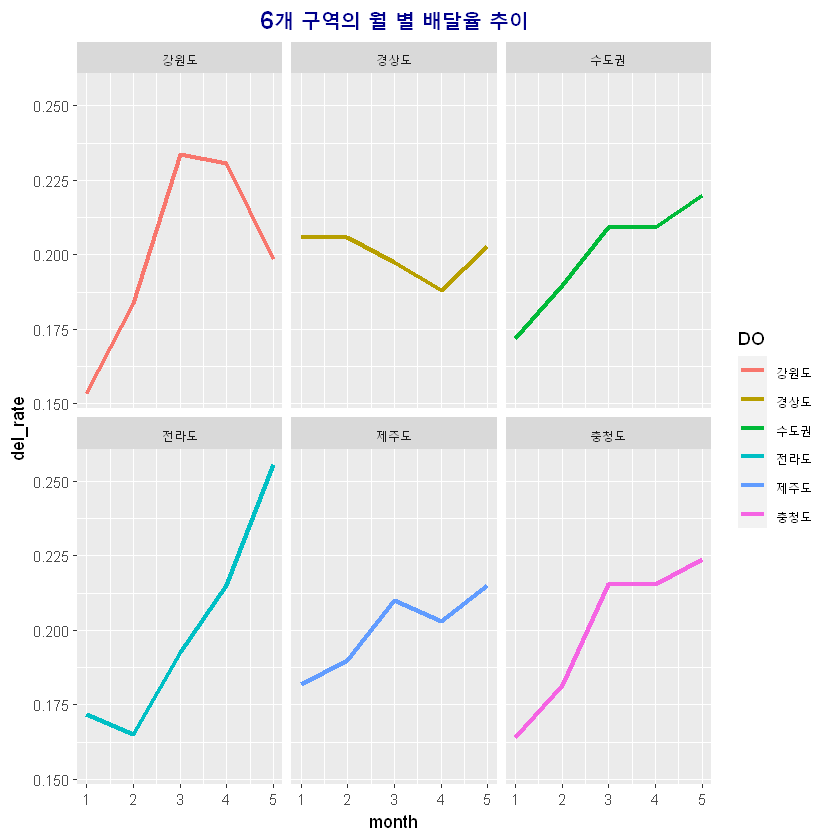

In [132]:
p8 <- ggplot(del.com.do.1) + geom_line(mapping = aes(x = month, y = del_rate, color = DO), lwd = 1.2) +
facet_wrap(~ DO) +
ggtitle("6개 구역의 월 별 배달율 추이") +
theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 15, color = "darkblue"))
p8

* del.com.do.1로 각 구역의 월별 배달율을 시각화하였습니다. 

* 경상도를 제외한 모든 구역에서 우상향하는 그래프를 볼 수 있으며, 특히 2월에서 3월의 배달율 증가폭이 가장 큰 것으로 보입니다. 이는 가장 큰 규모의 집단감염이었던 신천지 교회 집단감염의 영향을 받아 전국적으로 높은 강도의 사회적 거리두기가 시행되었기 때문이라고 짐작할 수 있습니다. 그 후 4월, 5월에는 증가폭이 매우 적은 것으로 보아 사회적 거리두기가 안정적으로 진행되고 있음을 알 수 있습니다.
* 경상도의 경우 우상향하는 그래프라고 볼 수 없으며 이는 대구의 중도절단된 데이터의 영향이 클 것으로 짐작됩니다.

### 2) 일상적 식사 메뉴의 배달 증가율

* 다음으로 저희는 배달 품목별 배달 양상이 다른지 살펴보기로 하였습니다. 배달음식은 주로 집에서 요리하기 어렵거나 특별히 맛있는 음식을 먹고싶어서 주문하는 경우가 많습니다. 하지만 사회적 거리두기를 실시하면서 배달음식으로 식사를 해결하는 경우가 많아짐에 따라, 삼시세끼 매일매일 치킨, 피자만 먹고 살 수는 없기 때문에 오히려 일상적 식사 메뉴의 배달 증가율이 높을 것이라는 생각에서 출발해 분석을 진행해보았습니다. 

In [21]:
# 각 시/도의 월별 배달 품목 비율
del.all.do <- group_by(del.com.do.1, month) %>% summarize(total_del = mean(del_rate))
head(del.all.do)

month,total_del
1,0.1748330
2,0.1859276
3,0.2097048
4,0.2102399
5,0.2192947


* 먼저 전체 시/도의 월별 배달 비율을 나타낸 del.all.do 데이터를 만들었습니다.

In [22]:
# 사회적 거리두기로 인한 배달건수 증가는 일상적 끼니를 배달로 많이 시켜먹느냐의 문제
# 치킨, 야식, 피자, 회: 일상적 끼니가 아니거나 꾸준히 많이 시켜먹는 품목
# 치킨, 야식, 피자, 회를 제외한 월별 배달 건수의 양상을 보도록 함

del.com.food <- subset(del.com.month, DLVR_STORE_INDUTY_NM != '치킨' & DLVR_STORE_INDUTY_NM != '야식' & 
                       DLVR_STORE_INDUTY_NM != '피자' & DLVR_STORE_INDUTY_NM != '회')

del.com.food$DO <- NA
del.com.food$DO <- ifelse(del.com.food$DLVR_STORE_SIDO %in%  do_list$수도권, '수도권', del.com.food$DO)
del.com.food$DO <- ifelse(del.com.food$DLVR_STORE_SIDO %in%  do_list$전라도, '전라도', del.com.food$DO)
del.com.food$DO <- ifelse(del.com.food$DLVR_STORE_SIDO %in%  do_list$경상도, '경상도', del.com.food$DO)
del.com.food$DO <- ifelse(del.com.food$DLVR_STORE_SIDO %in%  do_list$충청도, '충청도', del.com.food$DO)
del.com.food$DO <- ifelse(del.com.food$DLVR_STORE_SIDO == '제주특별자치도', '제주도', del.com.food$DO)
del.com.food$DO <- ifelse(del.com.food$DLVR_STORE_SIDO == '강원도', '강원도', del.com.food$DO)


* 전형적인 배달음식, 즉 평소에 주로 배달시켜먹는 음식인 '치킨, 야식, 피자, 회'를 제외한 일상적 식사메뉴의 배달 양상을 보여주는 del.com.food 데이터를 만들었습니다. 
* (분석은 전체 시/도로 진행할 것이지만, 각 구역별 1월에서 5월까지의 전체 배달량을 나타냈던 total_del 데이터를 해당 데이터와 합쳐서 분석하기 위해 del.com.food에도 DO 변수를 통해 각 시/도의 구역을 나타내주었습니다.)

In [23]:
del.com.do.2 <- del.com.food %>% group_by(DO, month) %>% summarize(month_del = n()) %>% filter(month != 6)
del.com.do.3 <- merge(del.com.do.2, total_del, key = 'DO') %>% mutate(del_rate = month_del/total_del)
del.com.do.month <- group_by(del.com.do.3, month) %>% summarize(total_del = mean(del_rate))

* total_del 데이터를 사용해 전체 배달에서 월별 일상적 식사의 배달이 차지하는 비율을 구한 후, 구역간 구분을 없애준 del.com.do.month를 만들어주었습니다. 예를 들어 1월의 일상적 식사 메뉴 배달량이 1월에서 5월까지의 전체 배달량에서 차지하는 비율(전체 시/도 평균)을 알 수 있습니다.

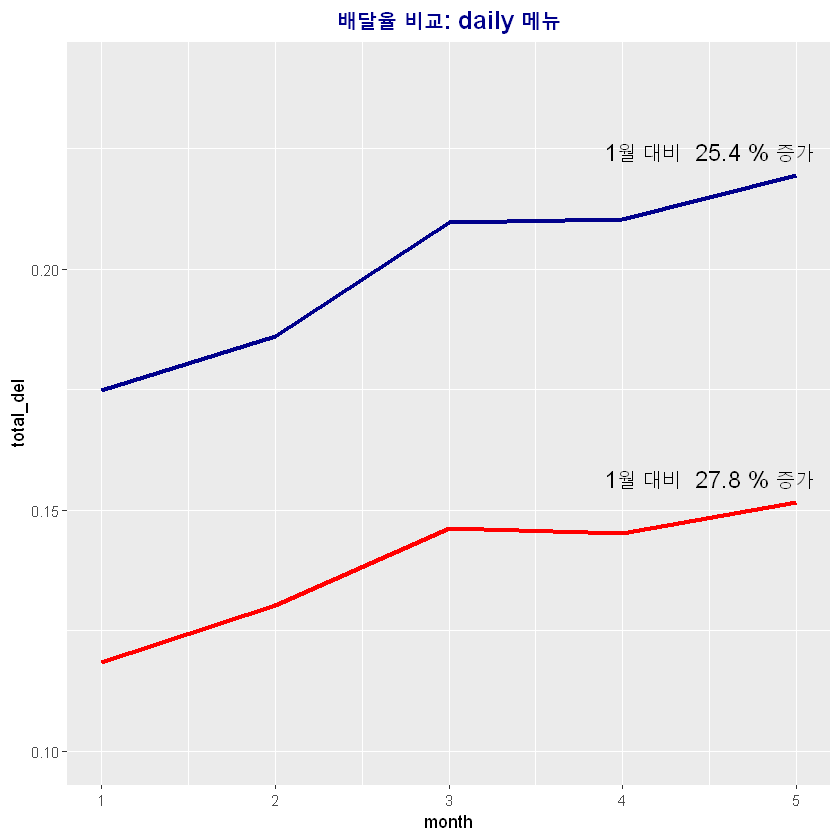

In [121]:
# 전체 배달 품목과 일상적 끼니 배달 품목 월별 비율 비교 그래프
all_increase <- round((del.all.do$total_del[5] - del.all.do$total_del[1])/del.all.do$total_del[1]*100, 1)
daily_increase <- round((del.com.do.month$total_del[5] - del.com.do.month$total_del[1])/del.com.do.month$total_del[1]*100, 1)
all_increase <- paste('1월 대비 ', all_increase, '% 증가')
daily_increase <- paste('1월 대비 ', daily_increase, '% 증가')

p9 <- ggplot() + geom_line(del.all.do, mapping = aes(x = month, y = total_del), color = 'dark blue', lwd = 1.2) + 
geom_line(del.com.do.month, mapping = aes(x = month, y = total_del), color = 'red', lwd = 1.2) +
annotate("text", x = 4.5 , y= del.all.do$total_del[5] + 0.005, label=all_increase, size=5) +
annotate("text", x = 4.5 , y= del.com.do.month$total_del[5] + 0.005, label=daily_increase, size=5) +
ylim(0.1, 0.24) +
ggtitle("배달율 비교: daily 메뉴") +
theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 15, color = "darkblue"))
p9

* del.com.do.month 데이터를 통해 시각화를 진행한 결과입니다. 파란 선을 통해 시간이 지남에 따라 전체 배달과 daily 메뉴의 배달이 증가했음을 알게 되었습니다. 또한 daily 메뉴의 증가율이 전체 배달 증가율 보다 높은 것으로 보아 일상적인 식사를 배달로 해결하는 경향을 파악할 수 있었습니다.

* 추가적으로 daily 메뉴와 그 외 메뉴인 special 메뉴의 배달율을 비교해 보았습니다. 위와 동일한 방법으로 데이터 전처리를 진행한 뒤, 시각화 하였습니다. 

In [25]:
del.com.food.s <- del.com.month
del.com.food.s$daily <- ifelse(del.com.month$DLVR_STORE_INDUTY_NM %in% c('치킨','야식','피자','회'), 'special', 'daily')

In [28]:
del.com.food.s$DO <- NA
del.com.food.s$DO <- ifelse(del.com.food.s$DLVR_STORE_SIDO %in%  do_list$수도권, '수도권', del.com.food.s$DO)
del.com.food.s$DO <- ifelse(del.com.food.s$DLVR_STORE_SIDO %in%  do_list$전라도, '전라도', del.com.food.s$DO)
del.com.food.s$DO <- ifelse(del.com.food.s$DLVR_STORE_SIDO %in%  do_list$경상도, '경상도', del.com.food.s$DO)
del.com.food.s$DO <- ifelse(del.com.food.s$DLVR_STORE_SIDO %in%  do_list$충청도, '충청도', del.com.food.s$DO)
del.com.food.s$DO <- ifelse(del.com.food.s$DLVR_STORE_SIDO == '제주특별자치도', '제주도', del.com.food.s$DO)
del.com.food.s$DO <- ifelse(del.com.food.s$DLVR_STORE_SIDO == '강원도', '강원도', del.com.food.s$DO)

In [29]:
del.com.do.2.s <- del.com.food.s %>% group_by(DO, month, daily) %>% summarize(month_del = n()) %>% filter(month != 6)
del.com.do.3.s <- merge(del.com.do.2.s, total_del, key = 'DO') %>% mutate(del_rate = month_del/total_del)
del.com.do.month.s <- group_by(del.com.do.3.s, month, daily) %>% summarize(total_del = mean(del_rate))

In [30]:
del.com.do.month.s$daily <- factor(del.com.do.month.s$daily)

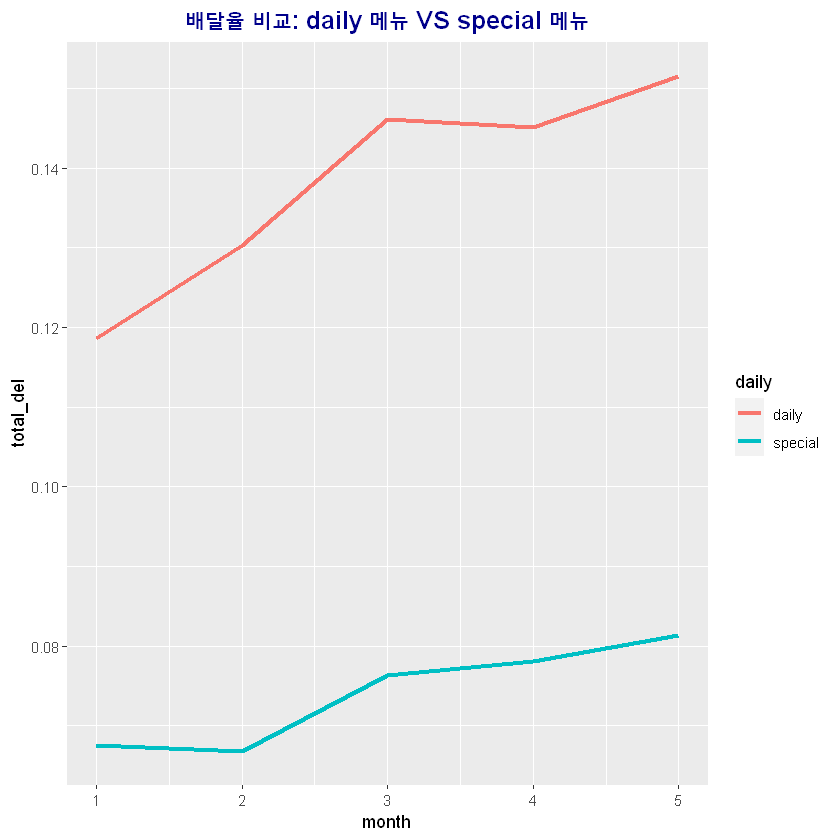

In [124]:
p10 <- ggplot(del.com.do.month.s, mapping = aes(x = month, y = total_del, color = daily)) +
geom_line(lwd = 1.2) +
ggtitle("배달율 비교: daily 메뉴 VS special 메뉴") +
theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 15, color = "darkblue"))
p10

* del.com.do.month.s 데이터를 통해 시각화를 진행한 결과입니다. 시간의 흐름에 따라 special 메뉴와 daily 메뉴의 배달율이 모두 증가했습니다. 그러나, daily 메뉴의 증가율이 special 메뉴의 배달 증가율 보다 높았습니다. 이를 통해 일상적인 식사를 배달로 해결하는 경향이 있음을 다시 한 번 확인할 수 있었습니다. 

### 3) 각 구역 별 배달 건수와 코로나 확진자 수의 관계

* 배달 데이터인 delivery 데이터와, 확진자 수 데이터인 timeprovince 데이터를 결합해 비교해 보았습니다. 이를 위해 몇 가지 데이터 wrangling을 해 주었습니다. 

In [32]:
# 배달이 완료된 데이터를 각 시/도별 그리고 배달 음식 카테고리 별로 묶은 del.do.food 데이터를 다시 만든 뒤,
# 시도를 do_list를 사용하여 도 단위로 바꾸어 줌
del.do.food <- group_by(del.com, DLVR_STORE_SIDO, DLVR_STORE_INDUTY_NM) 
del.do.food$DO <- NA
del.do.food$DO <- ifelse(del.do.food$DLVR_STORE_SIDO == '서울특별시', '서울', del.do.food$DO)
del.do.food$DO <- ifelse(del.do.food$DLVR_STORE_SIDO == '인천광역시', '인천', del.do.food$DO)
del.do.food$DO <- ifelse(del.do.food$DLVR_STORE_SIDO == '경기도', '경기도', del.do.food$DO)
del.do.food$DO <- ifelse(del.do.food$DLVR_STORE_SIDO %in%  do_list$전라도, '전라도', del.do.food$DO)
del.do.food$DO <- ifelse(del.do.food$DLVR_STORE_SIDO %in%  do_list$경상도, '경상도', del.do.food$DO)
del.do.food$DO <- ifelse(del.do.food$DLVR_STORE_SIDO %in%  do_list$충청도, '충청도', del.do.food$DO)
del.do.food$DO <- ifelse(del.do.food$DLVR_STORE_SIDO == '제주특별자치도', '제주도', del.do.food$DO)
del.do.food$DO <- ifelse(del.do.food$DLVR_STORE_SIDO == '강원도', '강원도', del.do.food$DO)
head(del.do.food)

SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,DO
4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,...,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NA,경상도
4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,...,4800,200,49000,2,NA,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NA,경기도
4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,...,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NA,서울
4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,...,4500,300,20000,2,NA,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NA,경기도
4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,...,6500,300,32000,2,NA,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NA,경기도
4577993,2020-01-01,C000238,1,C000238,S0001485,족발/보쌈,4119010800,경기도,부천시,...,3500,200,37000,1,승인:비씨카드사,2020-01-01 00:59:31,2020-01-01 01:00:30,2020-01-01 01:25:41,NA,경기도


In [33]:
# 결합을 위해 새로운 do_list를 만듦
do_list1 <- list('수도권' = c('서울','인천','경기도'),'전라도' = c('전라남도','전라북도','광주'),
               '경상도' = c('경상남도','경상북도','대구','부산'), '충청도' = c('대전','충청남도','충청북도'))

# delivery 데이터에 울산, 세종이 없으므로 time province 데이터에서도 울산, 세종을 제거함
t.pro <- subset(t.pro, province != '울산')
t.pro <- subset(t.pro, province != '세종')

In [34]:
unique(t.pro$province)

[1] "서울"     "부산"     "대구"     "인천"     "광주"     "대전"    
 [7] "경기도"   "강원도"   "충청북도" "충청남도" "전라북도" "전라남도"
[13] "경상북도" "경상남도" "제주도"

In [35]:
# time province 데이터에도 DO 열 생성
t.pro$DO <- NA
t.pro$DO <- ifelse(t.pro$province %in%  do_list1$수도권, '수도권', t.pro$DO)
t.pro$DO <- ifelse(t.pro$province %in%  do_list1$전라도, '전라도', t.pro$DO)
t.pro$DO <- ifelse(t.pro$province %in%  do_list1$경상도, '경상도', t.pro$DO)
t.pro$DO <- ifelse(t.pro$province %in%  do_list1$충청도, '충청도', t.pro$DO)
t.pro$DO <- ifelse(t.pro$province == '제주도', '제주도', t.pro$DO)
t.pro$DO <- ifelse(t.pro$province == '강원도', '강원도', t.pro$DO)

head(t.pro)

date,time,province,confirmed,released,deceased,DO
2020-01-20,16,서울,0,0,0,수도권
2020-01-20,16,부산,0,0,0,경상도
2020-01-20,16,대구,0,0,0,경상도
2020-01-20,16,인천,1,0,0,수도권
2020-01-20,16,광주,0,0,0,전라도
2020-01-20,16,대전,0,0,0,충청도


In [36]:
# [5/31일의 누적 확진자 수 = 전체 확진자 수] 임을 사용하여 각 도별 확진자 수 데이터 생성
t.pro.total <- t.pro %>% group_by(DO) %>% filter(date == '2020-05-31') %>% summarize(n = sum(confirmed))
t.pro.total

DO,n
강원도,57
경상도,8532
수도권,1907
전라도,72
제주도,15
충청도,252


In [37]:
# 6월은 6월 말 까지의 데이터가 없으므로 즉 데이터가 온전하지 않으므로 이는 제거해 줌
t.pro.1 <- t.pro %>% mutate(month = month(date)) %>% select(DO, month, confirmed, province) %>% filter(month != 6)
head(t.pro.1)


DO,month,confirmed,province
수도권,1,0,서울
경상도,1,0,부산
경상도,1,0,대구
수도권,1,1,인천
전라도,1,0,광주
충청도,1,0,대전


In [38]:
t.do.confirmed <- t.pro.1 %>% group_by(month, DO, province) %>% summarize(n = max(confirmed))  
t.do.confirmed.1 <- t.do.confirmed %>% group_by(DO, month) %>% summarize(month_confirmed = sum(n))

# confirmed_rate: 1월~5월 해당 month의 누적 확진자 수의 비율
# 즉, confirmed rate = (도별 n월까지의 누적 확진자 수/ 도별 5월까지의 누적 확진자 수)  (n=1,2,3,4,5)
t.do.confirmed.2 <- merge(t.do.confirmed.1, t.pro.total, key = 'DO') 
t.do.confirmed.rate <- t.do.confirmed.2 %>% mutate(confirmed_rate = month_confirmed /n)

head(t.do.confirmed.rate)

DO,month,month_confirmed,n,confirmed_rate
강원도,1,0,57,0.0000000
강원도,2,7,57,0.1228070
강원도,3,36,57,0.6315789
강원도,4,53,57,0.9298246
강원도,5,57,57,1.0000000
경상도,1,0,8532,0.0000000


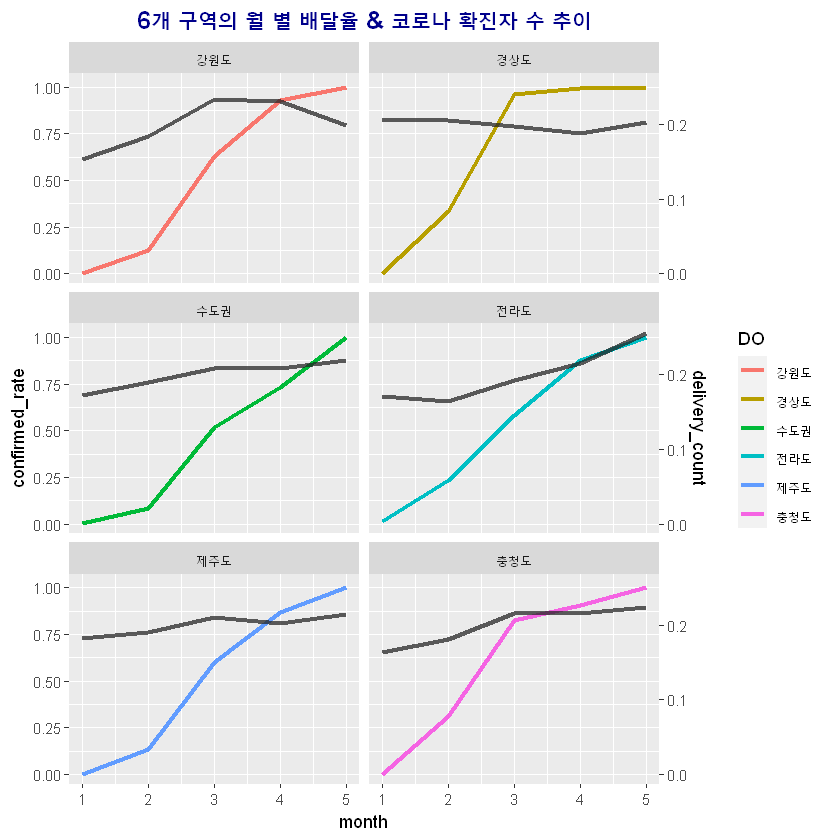

In [127]:
# 시간(월 단위)에 따른 도별 코로나 확진자 수 누적 비율 데이터 시각화(무지개 색)
p11 <- ggplot()+
geom_line(t.do.confirmed.rate, mapping = aes(x = month, y = confirmed_rate, color = DO), lwd = 1.2) +
facet_wrap(~ DO, nrow = 3)

# 시간(월 단위)에 따른 도별 배달 건 수 비율 데이터 시각화(회색)
p12 <- p11 + 
geom_line(del.com.do.1, mapping = aes(x = month, y = del_rate*4), color = "#222222BB", lwd = 1.2) +
facet_wrap(~ DO, nrow = 3) + 
scale_y_continuous(sec.axis = sec_axis(~./4, name = 'delivery_count')) +
ggtitle("6개 구역의 월 별 배달율 & 코로나 확진자 수 추이") +
theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 15, color = "darkblue"))

p12

* 경상도 지역을 제외하면, 대부분의 지역에서 코로나 확진자가 급격하게 증가하던 2월, 3월에 배달 비율이 증가했음을 확인할 수 있었습니다. 이는 "외출"에 대한 두려움 때문에 상대적으로 끼니를 해결하기 위해 배달을 시켜먹는 사람들이 늘어났기 때문입니다. 
* 가장 코로나의 영향이 심했던 경상도의 경우
* 1) 위에서 언급했듯이 대구 등 가장 코로나의 영향이 심했던 지역의 데이터의 중도 절단
* 2) 코로나에 대한 공포가 지나치게 심해, 배달 음식 조차도 꺼리고 다른 방식으로 끼니 해결하는 경향 
* 등의 이유로 다른 도들과 차이가 있을 것이라고 짐작해 볼 수 있었습니다. 

### 4) 포스트 코로나 시대, 배달에 걸리는 시간의 변화 

* 포스트 코로나 시대 이후 사회적 거리두기로 인해 대부분의 지역에서 배달을 더 많이 시켜먹음을 확인할 수 있었습니다. 그렇다면 가까운 거리더라도 나가는 것이 두려워서 배달을 시켜먹는 경향성이 있는지를 확인해보기로 하였습니다. 
* 배달 완료 시간 - 배달 출발 시간 을 배달에 걸리는 시간으로 설정하였습니다.

In [40]:
# time for delivery = 배달에 걸리는 시간
del$time_for_delivery <- del$DLVR_COMPT_TIME - del$DLVR_CARALC_TIME
# 배달하는데 걸린 시간을 수치형으로 바꿔줌
del$time_for_delivery <- as.numeric(del$time_for_delivery)

In [41]:
head(del)
table(is.na(del$time_for_delivery))

SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,time_for_delivery
4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,...,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NA,1199
4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,...,4800,200,49000,2,NA,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NA,603
4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,...,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NA,1020
4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,...,4500,300,20000,2,NA,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NA,522
4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,...,6500,300,32000,2,NA,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NA,1259
4577993,2020-01-01,C000238,1,C000238,S0001485,족발/보쌈,4119010800,경기도,부천시,...,3500,200,37000,1,승인:비씨카드사,2020-01-01 00:59:31,2020-01-01 01:00:30,2020-01-01 01:25:41,NA,1511



  FALSE    TRUE 
5055084  103240 

* 결측치가 상당히 있음을 알 수 있었습니다. 

In [42]:
# 결측치의 원인 중 배달이 완료되지 못하여 결측치가 생긴 경우 제거 -> 배달이 완료된 경우만 남김
del1 <- del[del$DLVR_REQUST_STTUS_VALUE == 1,]
table(is.na(del1$time_for_delivery))
head(del1)


  FALSE    TRUE 
5052531   23229 

SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,time_for_delivery
4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,...,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NA,1199
4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,...,4800,200,49000,2,NA,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NA,603
4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,...,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NA,1020
4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,...,4500,300,20000,2,NA,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NA,522
4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,...,6500,300,32000,2,NA,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NA,1259
4577993,2020-01-01,C000238,1,C000238,S0001485,족발/보쌈,4119010800,경기도,부천시,...,3500,200,37000,1,승인:비씨카드사,2020-01-01 00:59:31,2020-01-01 01:00:30,2020-01-01 01:25:41,NA,1511


In [43]:
# 그 외에도 배달에 걸린 시간을 구할 수 없는 경우 결측치 모두 제거
del2 <- del1[is.na(del1$time_for_delivery) == FALSE,]
table(is.na(del2$time_for_delivery))
head(del2)


  FALSE 
5052531 

SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,time_for_delivery
4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,...,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NA,1199
4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,...,4800,200,49000,2,NA,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NA,603
4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,...,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NA,1020
4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,...,4500,300,20000,2,NA,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NA,522
4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,...,6500,300,32000,2,NA,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NA,1259
4577993,2020-01-01,C000238,1,C000238,S0001485,족발/보쌈,4119010800,경기도,부천시,...,3500,200,37000,1,승인:비씨카드사,2020-01-01 00:59:31,2020-01-01 01:00:30,2020-01-01 01:25:41,NA,1511


In [44]:
# 일 별 배달에 걸린 시간을 평균 냄
time_for_delivery_data <- del2 %>% group_by(PROCESS_DT) %>% summarize(time_for_del = mean(time_for_delivery))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


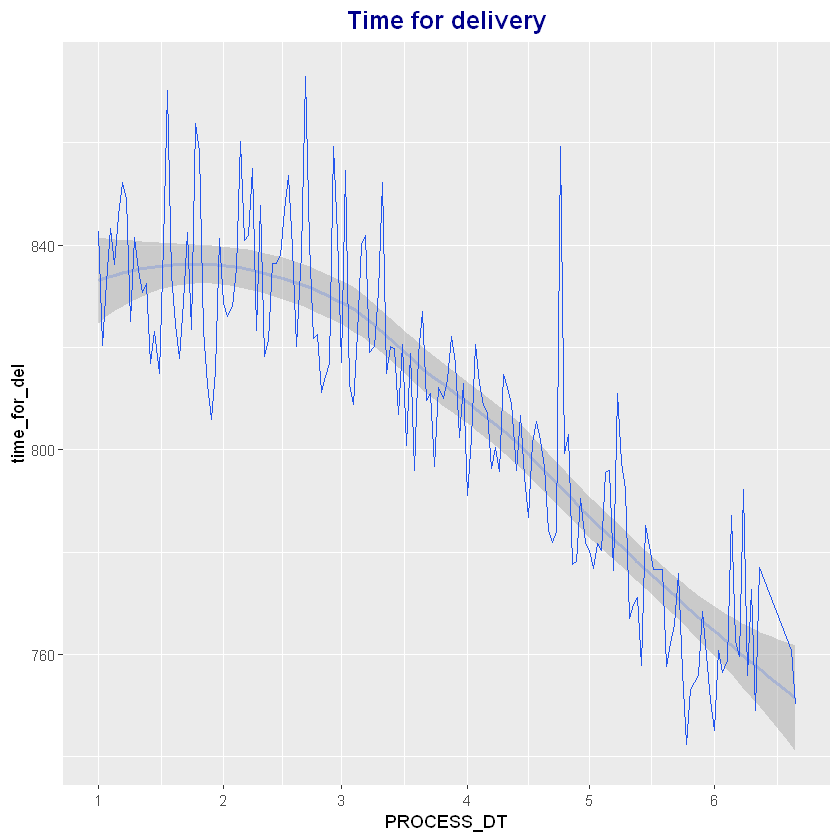

In [105]:
# 배달에 걸린 시간 시각화
p13 <- ggplot(data = time_for_delivery_data) +
geom_smooth(mapping = aes(x=PROCESS_DT, y=time_for_del), color = "#2255EE33")+
geom_line(mapping = aes(x=PROCESS_DT, y=time_for_del), color = "#2255EEFF") +
ggtitle("Time for delivery") +
theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 15, color = "darkblue"))

p13

* 시각화 결과 포스트 코로나 시대의 시작인 1월 말에서 2월 초를 기점으로 지속적으로 배달에 걸리는 시간이 감소하고 있음을 확인할 수 있었습니다. 즉 근거리더라도 직접 가지 않고 배달을 시켜 먹는 경향성이 사회적으로 늘어나고 있음을 알 수 있었습니다. 

---

## [2] 본론 3 : card, adstrd_master 데이터

#### 해당 데이터 불러오기

In [46]:
# card
card <- read_csv('C:\\Users\\uccoo\\Desktop\\KT_data\\card.csv')
ad.master <- read_csv('C:\\Users\\uccoo\\Desktop\\KT_data\\adstrd_master.csv')

Parsed with column specification:
cols(
  receipt_dttm = col_double(),
  adstrd_code = col_double(),
  adstrd_nm = col_character(),
  mrhst_induty_cl_code = col_double(),
  mrhst_induty_cl_nm = col_character(),
  selng_cascnt = col_double(),
  salamt = col_double()
)
Parsed with column specification:
cols(
  adstrd_code = col_double(),
  adstrd_nm = col_character(),
  brtc_nm = col_character(),
  signgu_nm = col_character()
)


* 카드 결제 내역에 대한 코로나의 영향을 알아보기 위해, card 데이터를 불러왔습니다. 동 단위로 구별되어 있는 card 데이터의 단점을 보완하기 위해서 adstd_master 데이터도 함께 불러왔습니다.

### 1) 날짜별 매출건수, 매출액 변화

* 앞서 불러온 card 데이터와 adstrd_master 데이터를 합치기 위해 card 데이터의 adstrd_code를 100으로 나누어 adstrd_master 데이터와 card 데이터의 adstrd_code를 같게 만들어준 후, adstrd_code를 기준으로 합쳐 주었습니다. 또한, card 데이터가 6월 14일에서 끊겨있다는 점을 고려하여 6월 데이터는 삭제한 후 분석을 진행하였습니다.

In [47]:
card$receipt_dttm <- ymd(card$receipt_dttm)
card$adstrd_code <- card$adstrd_code %/% 100
card <- merge(card, ad.master, by = 'adstrd_code') %>% mutate(month = month(receipt_dttm)) %>% filter(month != 6)

head(card)

adstrd_code,receipt_dttm,adstrd_nm.x,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt,adstrd_nm.y,brtc_nm,signgu_nm,month
11110515,2020-01-30,청운효자동,9004,페 인 트,3,22500,청운효자동,서울특별시,종로구,1
11110515,2020-03-12,청운효자동,8303,주류판매점,1,68000,청운효자동,서울특별시,종로구,3
11110515,2020-03-27,청운효자동,5030,문구용 품,1,18700,청운효자동,서울특별시,종로구,3
11110515,2020-01-04,청운효자동,4201,정장,5,543200,청운효자동,서울특별시,종로구,1
11110515,2020-02-20,청운효자동,8001,일반한식,378,14601100,청운효자동,서울특별시,종로구,2
11110515,2020-03-31,청운효자동,4078,인터넷Mall,1,200000,청운효자동,서울특별시,종로구,3


* 매출에 미치는 코로나의 영향을 알아보기 위해 날짜별 평균 매출 건수와 매출액을 구하여 이를 그래프로 시각화 하였습니다.

In [48]:
# 날짜별 매출건수, 매출액 변화
card.date <- group_by(card, receipt_dttm) %>% summarize(day_selng_cascnt = mean(selng_cascnt),
                                                  day_salamt = mean(salamt))
head(card.date)

receipt_dttm,day_selng_cascnt,day_salamt
2020-01-04,393.9144,14211180
2020-01-05,339.0857,9631334
2020-01-06,726.1665,18292555
2020-01-07,485.9142,17685752
2020-01-08,476.2511,21998506
2020-01-09,537.2911,18917808


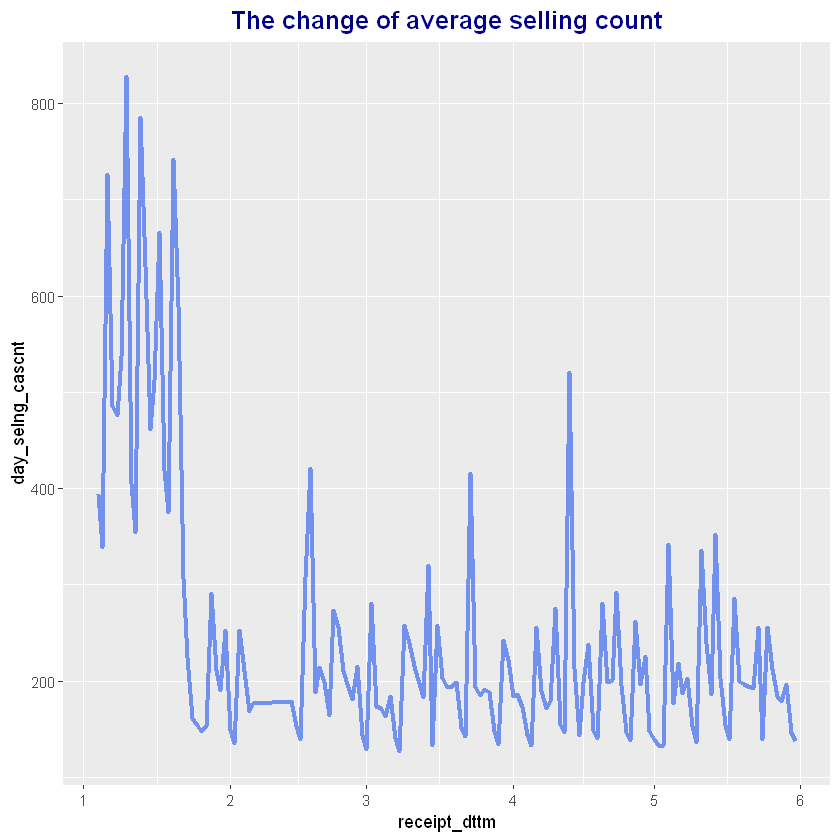

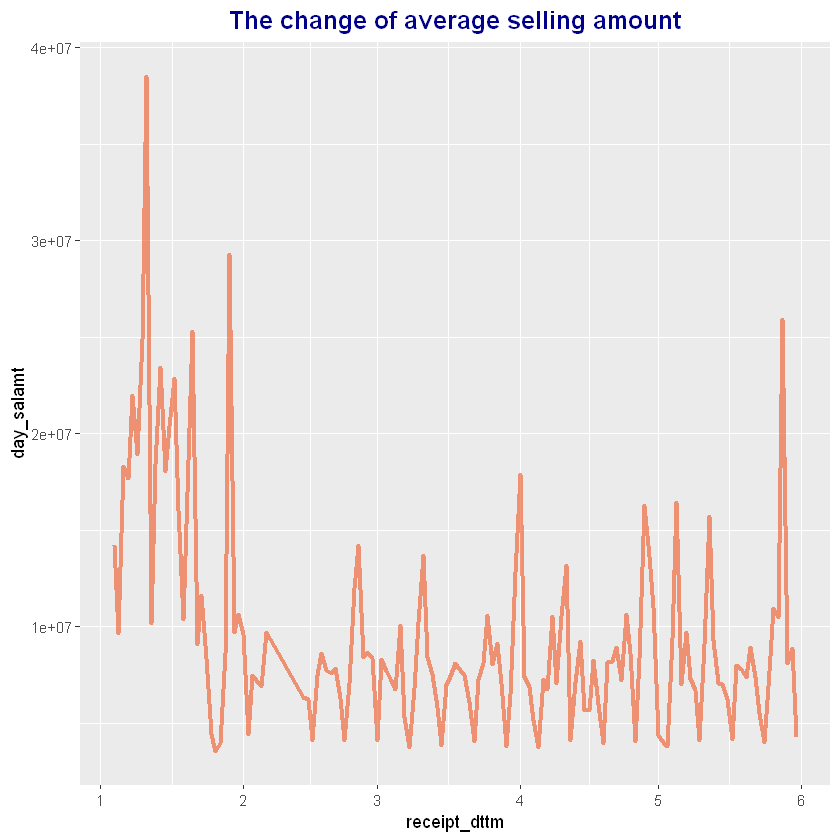

In [133]:
# 날짜별 평균 매출 건수와 매출액 변화 

p14.1 <- ggplot(card.date) +
geom_line(mapping = aes(x = receipt_dttm, y = day_selng_cascnt), color = '#2255EE99', lwd = 1.2) +
ggtitle("The change of average selling count") +
theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 15, color = "darkblue"))

p14.2 <- ggplot(card.date) +
geom_line(mapping = aes(x = receipt_dttm, y = day_salamt), color = '#EE552299', lwd = 1.2) +
ggtitle("The change of average selling amount") +
theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 15, color = "darkblue"))

p14.1
p14.2

# 매출건수와 매출액이 전반적으로 1월 말 ~ 2월 초를 기준으로 감소한 것을 알 수 있음

* 그래프를 통해 코로나가 본격적으로 시작 되었던 2월을 기준으로 매출액과 매출 건수가 확연하게 감소한 것을 확인 할 수 있었습니다.

### 2) 서울시 각 생활권의 날짜 별 매출 건수, 매출액 변화

* 이번에는 조금 더 자세하게 구 별로 나누어서 매출액과 매출 건수의 변화를 확인해보도록 하겠습니다.

In [50]:
unique(card$signgu_nm)
length(unique(card$signgu_nm))

[1] "종로구"   "중구"     "용산구"   "성동구"   "광진구"   "동대문구"
 [7] "중랑구"   "성북구"   "강북구"   "도봉구"   "노원구"   "은평구"  
[13] "서대문구" "마포구"   "양천구"   "강서구"   "구로구"   "금천구"  
[19] "영등포구" "동작구"   "관악구"   "서초구"   "강남구"   "송파구"  
[25] "강동구"

[1] 25

* 서울시를 25개의 구로 나누어 시각화를 진행하기에는 가독성이 떨어지므로, 아래의 사진과 같이 생활권을 기준으로 나누어 분석을 진행하도록 하겠습니다. 생활권에는 총 9개의 생활권(동북 1 생활권, 동북 2 생활권, 동남 1 생활권, 동남 2 생활권, 서북 생활권, 서남 1 생활권, 서남 2 생활권, 서남 3 생활권, 도심 생활권)으로 구성되어 있습니다.

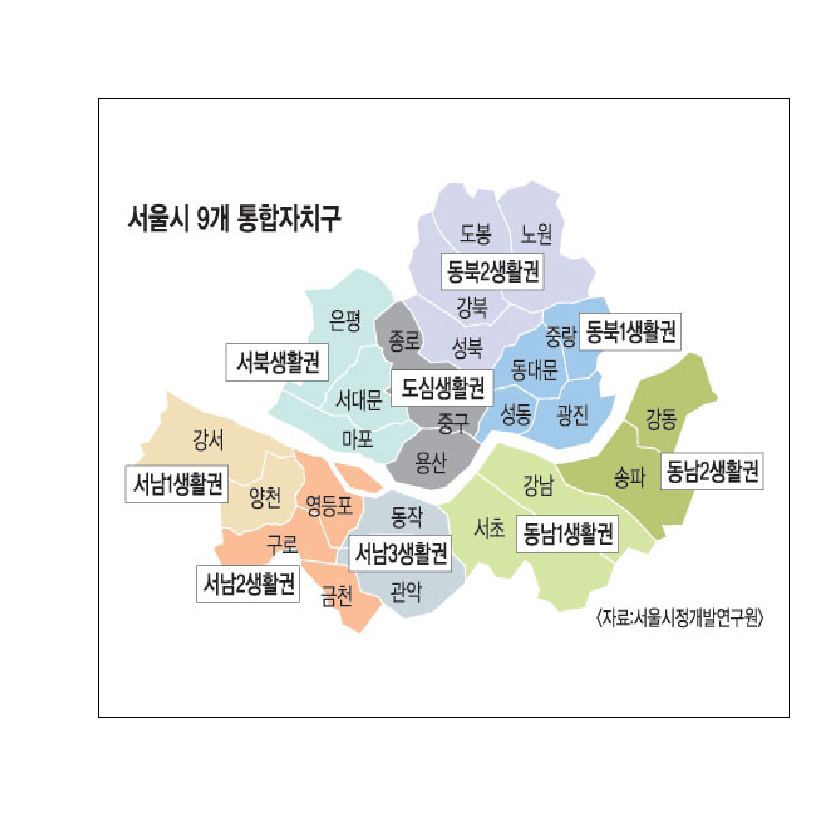

In [51]:
# 서울 시 생활권 분류 참고 사진
dosi <- readJPEG("city.jpg") 
plot(1:2, type='n', ann = FALSE, xaxt = 'n', yaxt = 'n')
 rasterImage(as.raster(dosi), 1, 1.1, 2, 1.9, interpolate=FALSE)

In [52]:
city_list <- list('동북1' = c('중랑구','광진구','성동구','동대문구'),
                  '동북2' = c('노원구','도봉구','강북구','성북구'),
                  '동남1' = c('서초구','강남구'),
                  '동남2' = c('강동구','송파구'),
                  '서북' = c('은평구','마포구','서대문구'),
                  '서남1' = c('강서구','양천구'),
                  '서남2' = c('영등포구','구로구','금천구'),
                  '서남3' = c('동작구','관악구'),
                  '도심' = c('종로구','중구','용산구'))

In [53]:
card$city <- NA
card$city <- ifelse(card$signgu_nm %in% city_list$'동북1', '동북1', card$city)
card$city <- ifelse(card$signgu_nm %in% city_list$'동북2', '동북2', card$city)
card$city <- ifelse(card$signgu_nm %in% city_list$'동남1', '동남1', card$city)
card$city <- ifelse(card$signgu_nm %in% city_list$'동남2', '동남2', card$city)
card$city <- ifelse(card$signgu_nm %in% city_list$'서북', '서북', card$city)
card$city <- ifelse(card$signgu_nm %in% city_list$'서남1', '서남1', card$city)
card$city <- ifelse(card$signgu_nm %in% city_list$'서남2', '서남2', card$city)
card$city <- ifelse(card$signgu_nm %in% city_list$'서남3', '서남3', card$city)
card$city <- ifelse(card$signgu_nm %in% city_list$'도심', '도심', card$city)


head(card)

adstrd_code,receipt_dttm,adstrd_nm.x,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt,adstrd_nm.y,brtc_nm,signgu_nm,month,city
11110515,2020-01-30,청운효자동,9004,페 인 트,3,22500,청운효자동,서울특별시,종로구,1,도심
11110515,2020-03-12,청운효자동,8303,주류판매점,1,68000,청운효자동,서울특별시,종로구,3,도심
11110515,2020-03-27,청운효자동,5030,문구용 품,1,18700,청운효자동,서울특별시,종로구,3,도심
11110515,2020-01-04,청운효자동,4201,정장,5,543200,청운효자동,서울특별시,종로구,1,도심
11110515,2020-02-20,청운효자동,8001,일반한식,378,14601100,청운효자동,서울특별시,종로구,2,도심
11110515,2020-03-31,청운효자동,4078,인터넷Mall,1,200000,청운효자동,서울특별시,종로구,3,도심


In [54]:
card.date.city <- group_by(card, receipt_dttm, city) %>% summarize(day_selng_cascnt = mean(selng_cascnt),
                                                  day_salamt = mean(salamt))

head(card.date.city)

receipt_dttm,city,day_selng_cascnt,day_salamt
2020-01-04,도심,673.2632,29109796
2020-01-04,동남1,451.7774,31245788
2020-01-04,동남2,240.0950,6193480
2020-01-04,동북1,220.5012,4461655
2020-01-04,동북2,182.1653,3464610
2020-01-04,서남1,333.8138,14718724


* 사회적 거리두기 시행 날짜와 매출액/매출 건수의 추이의 상관 관계를 알아보기 위하여 policy 데이터를 불러와 사회적 거리두기에 관련된 데이터만 추출하였습니다. 그 후 그래프로 시각화하기 위해 사회적 거리두기 시행 날짜만 추출하여 이를 숫자 형태로 바꾸어 주었습니다.

In [55]:
policy <- read_csv('C:\\Users\\uccoo\\Desktop\\KT_data\\COVID_19\\Policy.csv')
policy %>% filter(type == "Social")

Parsed with column specification:
cols(
  policy_id = col_double(),
  country = col_character(),
  type = col_character(),
  gov_policy = col_character(),
  detail = col_character(),
  start_date = col_date(format = ""),
  end_date = col_date(format = "")
)


policy_id,country,type,gov_policy,detail,start_date,end_date
29,Korea,Social,Social Distancing Campaign,Strong,2020-02-29,2020-03-21
30,Korea,Social,Social Distancing Campaign,Strong,2020-03-22,2020-04-19
31,Korea,Social,Social Distancing Campaign,Weak,2020-04-20,2020-05-05
32,Korea,Social,Social Distancing Campaign,Weak(1st),2020-05-06,NA
33,Korea,Social,Thanks to Challenge korea,Relay Cheer Campaign in SNS,2020-04-16,NA


In [56]:
start_of_weak_distance_policy <- policy %>% filter(type== "Social") %>% head(4) 
start_weak <- as.numeric(start_of_weak_distance_policy$start_date)
start_weak

[1] 18321 18343 18372 18388

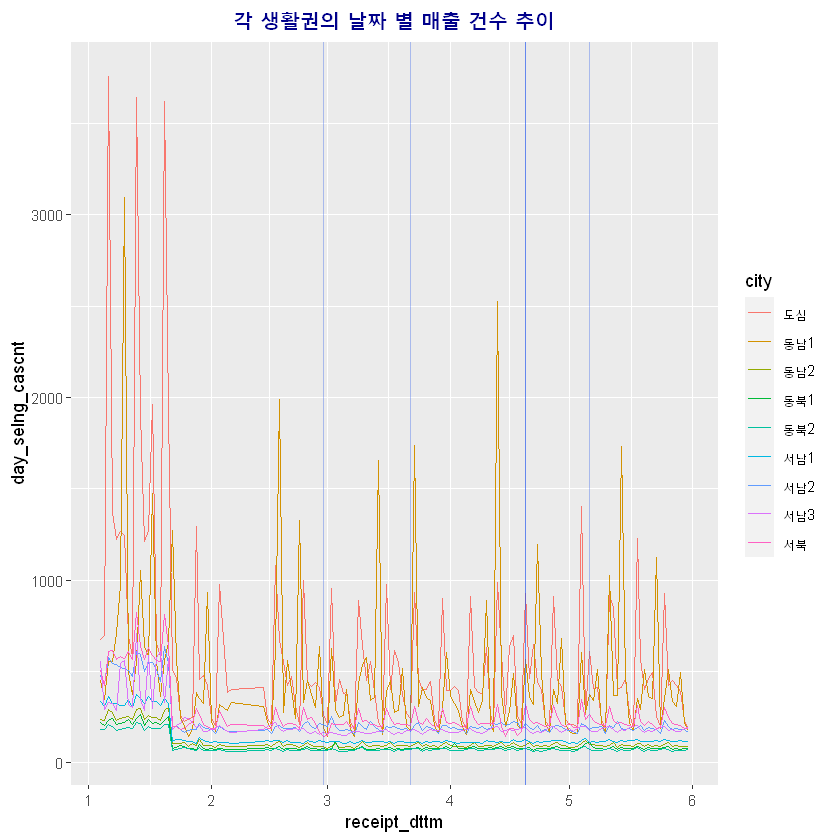

In [57]:
# 사회적 거리두기의 강도 약화 -> 4월 20일부터

p15 <- ggplot(card.date.city) +
geom_line(mapping = aes(x = receipt_dttm, y = day_selng_cascnt, color = city)) + 
geom_vline(xintercept = start_weak, color = c('#2255EE55','#2255EE55','#2255EEAA','#2255EE55')) +
ggtitle("각 생활권의 날짜 별 매출 건수 추이") +
theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 15, color = "darkblue"))
p15

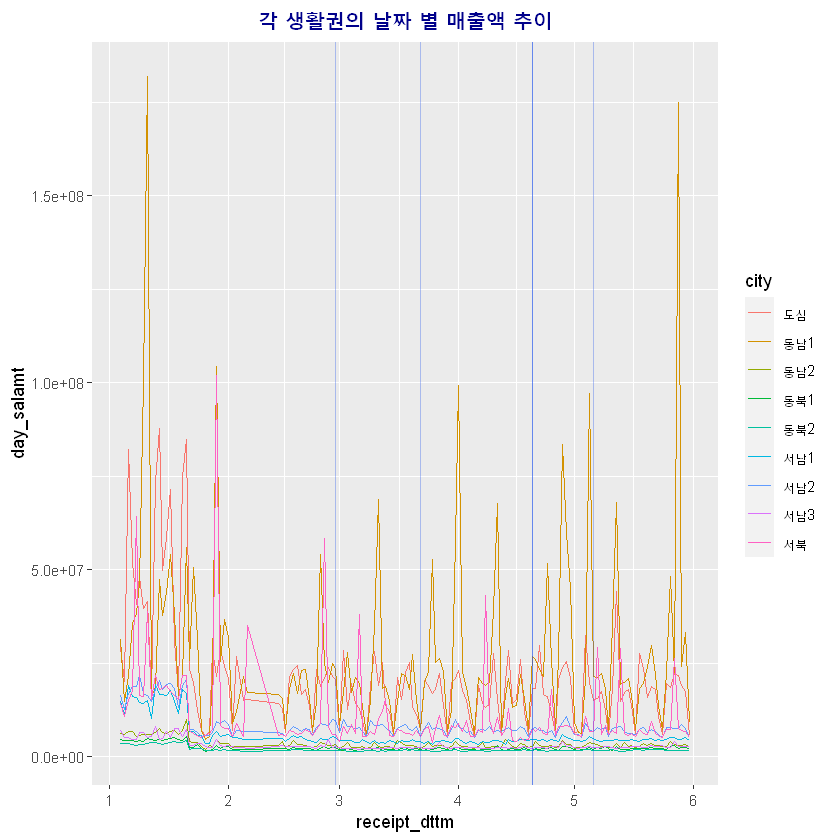

In [58]:
p16 <- ggplot(card.date.city) +
geom_line(mapping = aes(x = receipt_dttm, y = day_salamt, color = city)) +
geom_vline(xintercept = start_weak, color = c('#2255EE55','#2255EE55','#2255EEAA','#2255EE55')) +
ggtitle("각 생활권의 날짜 별 매출액 추이") +
theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 15, color = "darkblue"))
p16

* 위의 두 개의 그래프를 통해서, 코로나가 본격적으로 시작되었던 1월 말에 모든 생활권에서의 매출액과 매출 건수 모두 급격히 감소했음을 알 수 있었습니다. 그 후, 4월에는 도심권과 동남1권에서의 매출액과 서북권의 매출 건수가 소폭 상승하였는데, 이는 4/20에 사회적 거리두기의 강도를 약화 정책이 시행된 것으로부터 코로나 사태 완화의 영향임을 알 수 있었습니다. 

### 3) 매출 건수 상위 10개 업종의 날짜 별 매출 건수, 매출액 변화

* 마지막으로, 가맹업 업종 별 매출액과 매출 건수의 변화를 확인해보도록 하겠습니다. card 데이터에서의 업종은 총 260개로, 이를 모두 분석하는 것은 의미가 없다고 판단하여 매출 '건수'가 가장 많은 10개의 업종에 대해서만 분석을 진행하였습니다.

In [59]:
top10 <- card %>% group_by(mrhst_induty_cl_nm) %>% summarize(number = sum(selng_cascnt)) %>% arrange(number) %>% tail(10)
top10_list <- top10$mrhst_induty_cl_nm
top10_list

[1] "인터넷Mall"     "대형할인점"     "인터넷종합Mall" "슈퍼 마켓"     
 [5] "일반한식"       "서양음식"       "택   시"        "편 의 점"      
 [9] "기타전문점"     "인터넷P/G"

* 매출 건수가 가장 많은 10개의 업종에 대하여, 월별 매출 건수의 합계를 구하여 월별 매출 건수의 변화를 그래프를 통해 시각화하였습니다.

In [60]:
card2 <- card %>% filter(mrhst_induty_cl_nm %in% top10_list) %>% group_by(month, mrhst_induty_cl_nm) %>% 
summarize(number = sum(selng_cascnt)) 

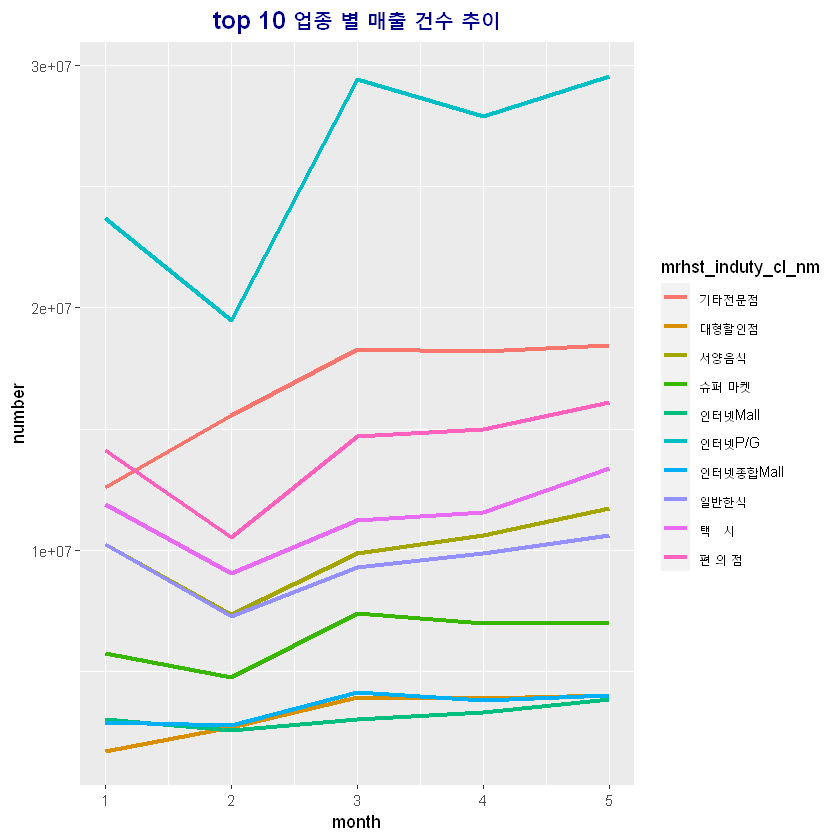

In [128]:
p17 <- ggplot(card2) +
geom_line(mapping = aes( x= month, y= number,  color =  mrhst_induty_cl_nm), lwd = 1.2) +
ggtitle("top 10 업종 별 매출 건수 추이") +
theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 15, color = "darkblue"))
p17

* 위 그래프를 통해, 코로나의 영향이 가장 컸던 2월에 서양음식, 슈퍼 마켓, 인터넷 P/G, 일반 한식, 택시, 편의점 6개의 업종의 매출 건수가 급격하게 줄었음을 알 수 있었습니다. 이를 제외한 나머지 네 개의 업종인 기타전문점, 대형할인점, 인터넷Mall, 인터넷종합Mall에서는 매출 건수가 증가했음을 알 수 있었습니다.

* 매출 건수가 가장 많은 10개의 업종에 대하여, 월별 매출액의 합계를 구하여 월별 매출액의 변화를 그래프를 통해 시각화하였습니다.

In [62]:
card3 <- card %>% filter(mrhst_induty_cl_nm %in% top10_list) %>% group_by(month, mrhst_induty_cl_nm) %>% 
summarize(number = sum(salamt))

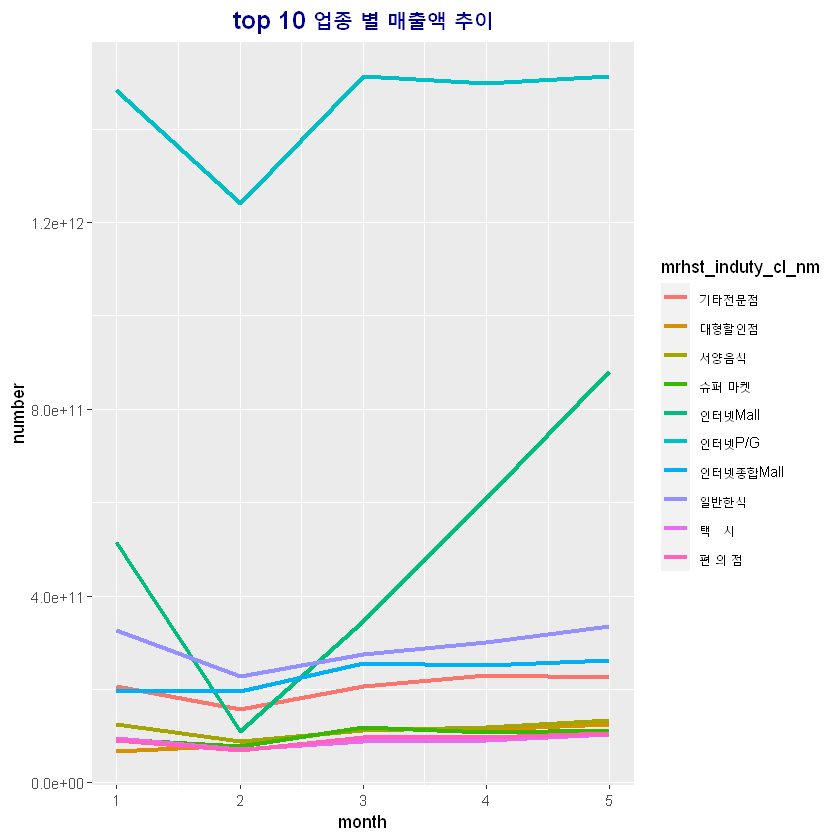

In [129]:
p18 <- ggplot(card3) +
geom_line(mapping = aes( x= month, y= number,  color =  mrhst_induty_cl_nm), lwd = 1.2) +
ggtitle("top 10 업종 별 매출액 추이") +
theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 15, color = "darkblue"))
p18

* 인터넷P/G와 인터넷Mall의 값이 너무 커서 나머지 항목들의 시각화가 잘 이루어지지 않아, 이 두 항목을 제거한 그래프를 다시 만들어 보았습니다.

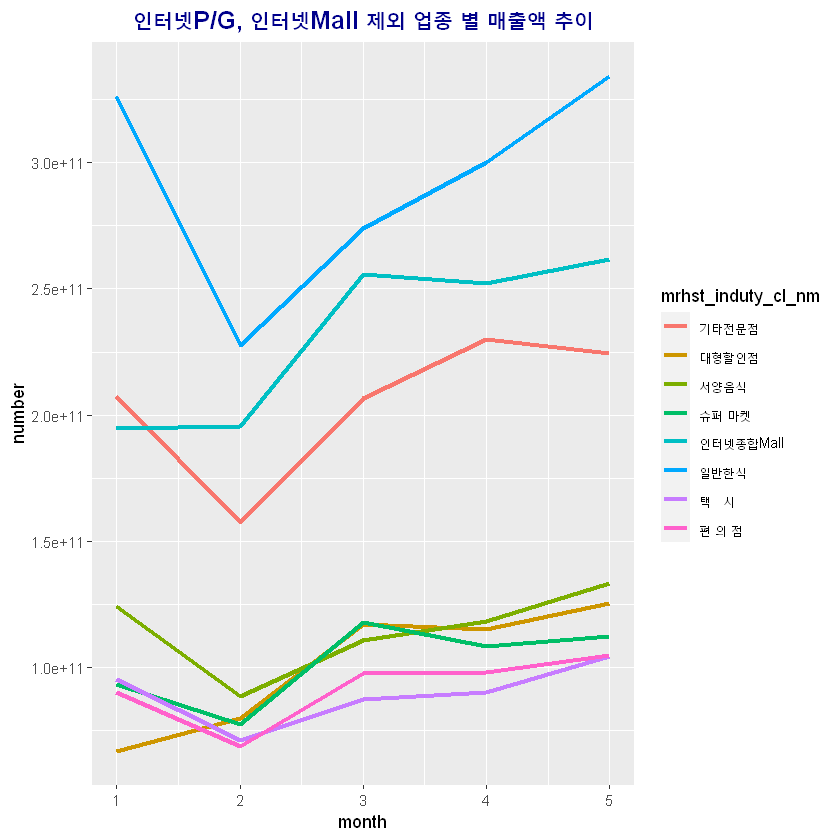

In [130]:
# 인터넷P/G, 인터넷Mall을 제거하고 다시 그림
card4 <- card3 %>% filter(mrhst_induty_cl_nm != "인터넷P/G")
card5 <- card4 %>% filter(mrhst_induty_cl_nm != "인터넷Mall")

p19 <- ggplot(card5) +
geom_line(mapping = aes( x= month, y= number,  color =  mrhst_induty_cl_nm), lwd = 1.2) +
ggtitle("인터넷P/G, 인터넷Mall 제외 업종 별 매출액 추이") +
theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 15, color = "darkblue"))
p19

* 매출액의 그래프는 매출 건수의 그래프와는 약간 다른 양상을 보였습니다. 코로나의 영향이 가장 컸던 2월에 매출 건수가 감소했던 서양음식, 슈퍼 마켓, 인터넷P/G,  일반한식, 택시, 편의점의 6개의 업종과 더불어 매출 건수가 증가했던 인터넷Mall과 기타전문점의 매출액도 감소했음을 알 수 있었습니다. 대형할인점과 인터넷종합Mall 이 두 개의 업종만이 매출액과 매출 건수 모두 증가했는데, 이는 코로나 사태로 인한 사재기 현상과 인터넷 쇼핑 이용 증가가 원인이라고 추측할 수 있습니다.

---

## [2] 본론 4 : Index 데이터

#### 해당 데이터 불러오기

In [65]:
index <- read_csv('C:\\Users\\uccoo\\Desktop\\KT_data\\index.csv')
time <- read_csv('C:\\Users\\uccoo\\Desktop\\KT_data\\COVID_19\\Time.csv')

Parsed with column specification:
cols(
  period = col_double(),
  catl = col_character(),
  catm = col_character(),
  age = col_double(),
  gender = col_character(),
  sido = col_character(),
  sigungu = col_character(),
  cgi = col_double()
)
Warning message:
"21343 parsing failures.
 row col expected actual                                            file
6242 age a double    all 'C:\Users\uccoo\Desktop\KT_data\index.csv'
6243 age a double    all 'C:\Users\uccoo\Desktop\KT_data\index.csv'
6244 age a double    all 'C:\Users\uccoo\Desktop\KT_data\index.csv'
6245 age a double    all 'C:\Users\uccoo\Desktop\KT_data\index.csv'
6246 age a double    all 'C:\Users\uccoo\Desktop\KT_data\index.csv'
.... ... ........ ...... ...............................................
See problems(...) for more details.
"Parsed with column specification:
cols(
  date = col_date(format = ""),
  time = col_double(),
  test = col_double(),
  negative = col_double(),
  confirmed = col_double(),
  released = col_

* 다음으로 품목 별 소비지수 데이터를  코로나 데이터와 연관지어 분석해 보았습니다. 

### 1)  월 별, 품목 별(중분류) 소비 지수의 변화 파악 

* 먼저, index 데이터의 전처리를 진행하였습니다.

In [66]:
# index 데이터 확인 
nrow(index)
summary(index)

[1] 127525

     period           catl               catm                age       
 Min.   :201901   Length:127525      Length:127525      Min.   :20.00  
 1st Qu.:201905   Class :character   Class :character   1st Qu.:30.00  
 Median :201909   Mode  :character   Mode  :character   Median :40.00  
 Mean   :201935                                         Mean   :39.99  
 3rd Qu.:202001                                         3rd Qu.:50.00  
 Max.   :202005                                         Max.   :60.00  
                                                        NA's   :21343  
    gender              sido             sigungu               cgi         
 Length:127525      Length:127525      Length:127525      Min.   :   0.00  
 Class :character   Class :character   Class :character   1st Qu.:  75.65  
 Mode  :character   Mode  :character   Mode  :character   Median :  92.49  
                                                          Mean   :  98.50  
                                            

In [67]:
table(index$age) # age에 결측치 존재 
table(index$gender) # 대부분 하나의 (나이대, 중분류, 세부지역) 별
                    # 3개의 성별이 존재, 수가 완전히 일치하지 않으므로
                    # 모든 경우 F,M,all의 성별이 있는 것은 아님. 
table(index$sigungu) # 마찬가지로, 각 시군구 별 데이터의 수가 모두 동일하지는 
                     # 않음 즉 모든 시군구의 데이터가 존재하지는 않음 


   20    30    40    50    60 
21205 21263 21300 21281 21133 


  all     F     M 
42629 42559 42337 


     all   강남구   강동구   강북구   강서구   관악구   광진구   구로구 
    5165     4896     4873     4894     4896     4887     4895     4895 
  금천구   노원구   도봉구 동대문구   동작구   마포구 서대문구   서초구 
    4896     5155     4893     4895     4582     4893     4893     4896 
  성동구   성북구   송파구   양천구 영등포구   용산구   은평구   종로구 
    4896     4891     5136     4831     4896     4892     4896     4877 
    중구   중랑구 
    4896     4810 

* index 데이터 중에서 age 열을 보면 NA 즉 결측치가 20000개 정도 있는 것을 확인할 수 있는데, 이들의 나이를 추정할 수 없으므로 결측치를 제거해 주었습니다. 

* 또한 데이터가 온전하지 않은 gender와 sigungu 열의 경우에는 각 평균 값을 이용하기로 결정하였습니다. 즉, 성별과 시군구는 고려하지 않고 품목 별 소비지수를 살펴보기로 하였습니다. 

In [68]:
# age 결측치 제거
index2 <- index %>% filter(!is.na(age)) 
table(index2$age) 


   20    30    40    50    60 
21205 21263 21300 21281 21133 

In [69]:
# period 열으로부터 month, year 추출
index2$month <- substr(index2$period, 5, 6)
head(index2$month)
index2$year<- substr(index2$period, 1, 4)
head(index2$year)

[1] "01" "01" "01" "01" "01" "01"

[1] "2019" "2019" "2019" "2019" "2019" "2019"

In [70]:
# month, year열의 데이터 타입 수치형으로 바꿈 
index3 <- index2
index3$month <- as.numeric(strtoi(index2$month))
index3$year <- as.numeric(strtoi(index2$year))

In [71]:
str(index2$month)
str(index2$year)

 chr [1:106182] "01" "01" "01" "01" "01" "01" "01" "01" "01" "01" "01" "01" ...
 chr [1:106182] "2019" "2019" "2019" "2019" "2019" "2019" "2019" "2019" ...


In [72]:
table(index3$month)
head(index3)


    1     2     3     4     5     6     7    10    11    12 
12493 12493 12487 12471 12452  6243  6253  6256  6259  6263 

period,catl,catm,age,gender,sido,sigungu,cgi,month,year
201901,건강/의료용품,건강관리용품,20,F,서울,관악구,115.37464,1,2019
201901,건강/의료용품,건강관리용품,20,F,서울,광진구,119.59645,1,2019
201901,건강/의료용품,건강관리용품,20,F,서울,도봉구,156.99285,1,2019
201901,건강/의료용품,건강관리용품,20,F,서울,동작구,58.34273,1,2019
201901,건강/의료용품,건강관리용품,20,F,서울,마포구,145.14760,1,2019
201901,건강/의료용품,건강관리용품,20,F,서울,성북구,78.89383,1,2019


In [73]:
# index3 데이터에서 필요한 열들 추출한 뒤, 각 행 별 cgi의 평균 구함.  
index4 <- index3 %>% group_by(year, month, catl, catm) %>% summarize(mean_cgi = mean(cgi))

# 2019년의 month와 2020년의 month를 비교하기 위해 2020년의 month에는 12를 더해 줌. 
index4$month <- ifelse(index4$year == 2020, index4$month + 12, index4$month)

In [74]:
tail(index4)
dim(index4)
summary(index4)
TF <- is.na(index4)

year,month,catl,catm,mean_cgi
2020,17,식품,주류,94.68899
2020,17,일용품,생활용품,73.56038
2020,17,일용품,애완동물용품,80.53145
2020,17,화장품,바디/헤어용품,59.67965
2020,17,화장품,뷰티소품,70.00466
2020,17,화장품,화장품,58.38344


[1] 270   5

      year          month            catl               catm          
 Min.   :2019   Min.   : 1.000   Length:270         Length:270        
 1st Qu.:2019   1st Qu.: 4.000   Class :character   Class :character  
 Median :2019   Median :10.000   Mode  :character   Mode  :character  
 Mean   :2019   Mean   : 9.008                                        
 3rd Qu.:2020   3rd Qu.:14.000                                        
 Max.   :2020   Max.   :17.000                                        
                NA's   :17                                            
    mean_cgi     
 Min.   : 46.10  
 1st Qu.: 86.04  
 Median : 97.23  
 Mean   : 98.29  
 3rd Qu.:105.11  
 Max.   :177.14  
                 

* 각 월별 품목의 소비지수 변화의 변화를 알고자 하는 것이 목표이므로 year month, catl, catm 열을 추출한 뒤, 각 행 별 cgi(소비지수)의 평균을 구해 mean_cgi에 저장하였습니다.  
* 또한, 2019년의 1월과 2020년의 1월 이렇게 월은 같지만 년도가 다른 경우를 구분하기 위해 2020년도의 month에 12를 더해주었습니다. 

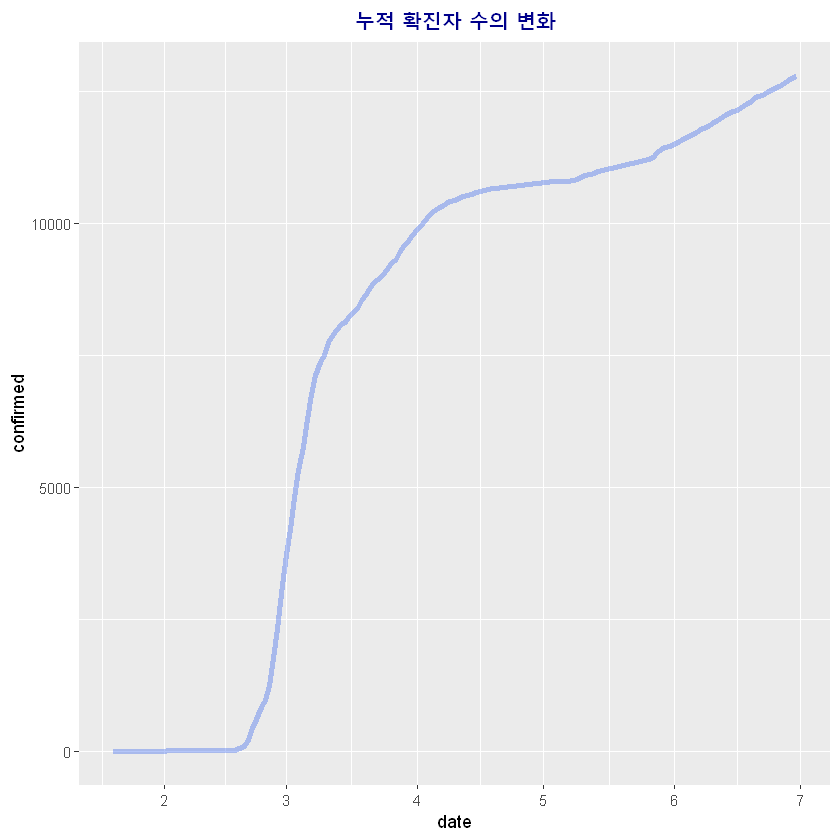

In [75]:
p20 <- ggplot( data = time ) +
geom_line(mapping = aes(x = date, y = confirmed), color = "#2255EE55", lwd = 1.5) +
ggtitle("누적 확진자 수의 변화") +
theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 15, color = "darkblue"))
p20

* Time 데이터의 누적 확진자 수의 변화를 그래프를 통해 확인한 결과 본격적인 코로나 확산은 2월 중순 ~ 2월 말에 시작된 것을 확인할 수 있었습니다. 따라서 아래 그래프에도 2020년 2월 2즉 14월에 파란 선으로 표시를 해 주었습니다.

Warning message:
"Removed 17 row(s) containing missing values (geom_path)."

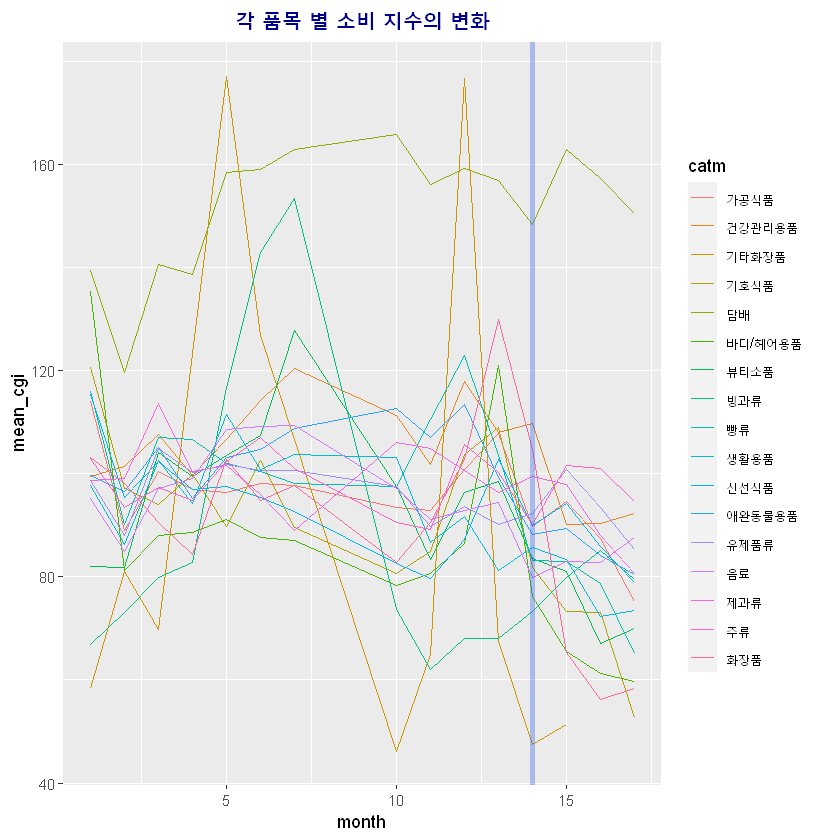

In [76]:
p21 <- ggplot(index4) +
geom_line( mapping = aes(x= month, y =mean_cgi, color = catm)) +
geom_vline(xintercept=14, col = "#2255EE55", lwd = 1.5) + 
ggtitle("각 품목 별 소비 지수의 변화") +
theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 15, color = "darkblue"))
p21

* 위의 그래프에서 각 품목 별 소비지수의 변화를 나타내었지만, 너무 품목이 많아 한 눈에 알아보기 어렵기 때문에 2020년 2월에 소비가 2018년도에 비해 늘어난 품목들과 그렇지 않은 품목들로 나눈 뒤 아래 그래프들을 그려 보았습니다. 이처럼 두 가지로 품목들을 나눈 이유는 포스트 코로나 시대가 시작된 2월을 중점으로 그래프의 개형이 비슷한 품목들끼리 묶기 위해서입니다. 

In [77]:
index_in_Feb <- index4 %>% filter(month == 14)
index_in_Jan <- index4 %>% filter(month == 13)
rate_JanFeb <- index_in_Feb$mean_cgi / index_in_Jan$mean_cgi
increase_TF <- rate_JanFeb > 1
index_catm_list <- unique(index4$catm)

In [78]:
# 1월에 비해 2월에 소비 지수가 증가한 품목들 
increase_list <- index_catm_list[increase_TF]
increase_list

# 1월에 비해 2월에 소비 지수가 증가한 품목들 
decrease_list <- index_catm_list[!increase_TF]
decrease_list

[1] "건강관리용품" "빙과류"       "유제품류"     "제과류"       "생활용품"

[1] "가공식품"      "기호식품"      "담배"          "빵류"         
 [5] "신선식품"      "음료"          "주류"          "애완동물용품" 
 [9] "기타화장품"    "바디/헤어용품" "뷰티소품"      "화장품"

Warning message:
"Removed 5 row(s) containing missing values (geom_path)."

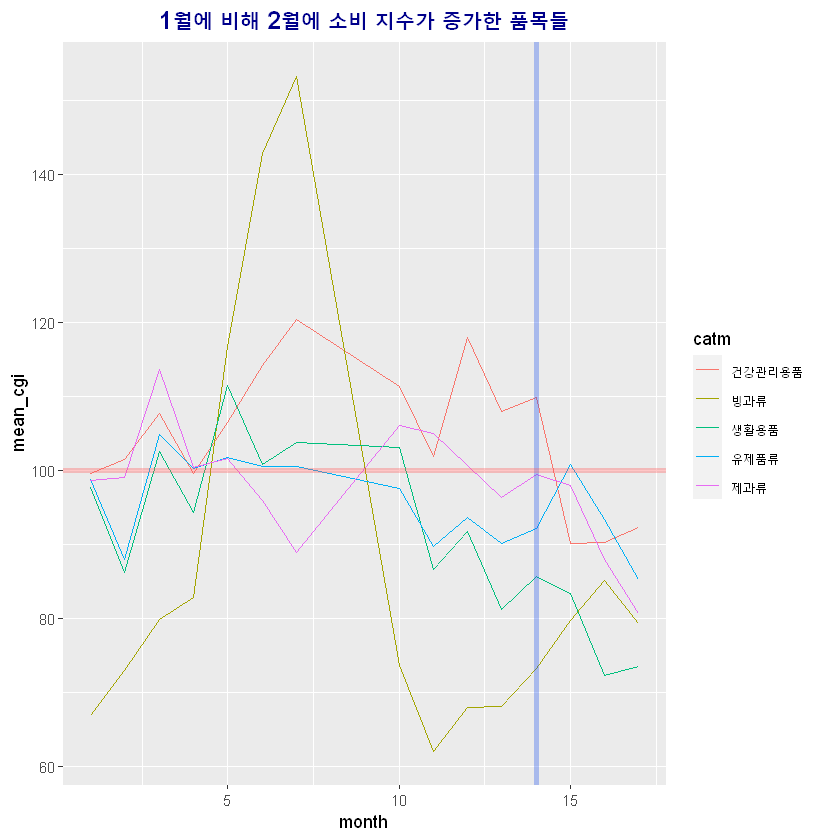

In [79]:
index_increase <- index4 %>% filter(catm %in% increase_list)

p22 <- ggplot(index_increase) +
geom_line( mapping = aes(x= month, y =mean_cgi, color = catm)) +
geom_vline(xintercept=14, col = "#2255EE55", lwd = 1.5) + 
geom_hline(yintercept=100, col = "#FF555555", lwd = 1.5 ) +
ggtitle("1월에 비해 2월에 소비 지수가 증가한 품목들") +
theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 15, color = "darkblue"))
p22

* 빨간선은 소비지수가 2018년도에 비해 감소했는지, 증가했는지를 나타내는 기준 선이고
* 파란선은 포스트 코로나 시대와 그 이전을 구분한 기준 선입니다. 

* 2020년 1월에 비해 2월에 소비 지수가 증가한 품목들은 2020년 2월 이후(파란 선 오른쪽)에는 대체적으로 mean_cgi가 100보다 작음을 확인할 수 있습니다. 즉, 3월의 유제품류를 제외하면, 위의 모든 품목에서 소비가 2018년도 해당 월에 비해 감소하였습니다. 포스트 코로나 시대의 빙과류, 생활용품, 유품류, 제과류의 소비 지수가 2018년도 각 월에 비해 감소 했고, 1월보다 2월의 수치가 더 높기에 소비 지수의 감소 '정도'가 1월에 비해 줄어들었기는 했지만 코로나의 영향으로 외출을 자제하는 사람들이 늘어난 결과, 외출 시 많이 사 먹는 빙과류, 제과류 등의 소비 지수가 2018년도에 비해 감소했음을 확인할 수 있습니다.

Warning message:
"Removed 12 row(s) containing missing values (geom_path)."

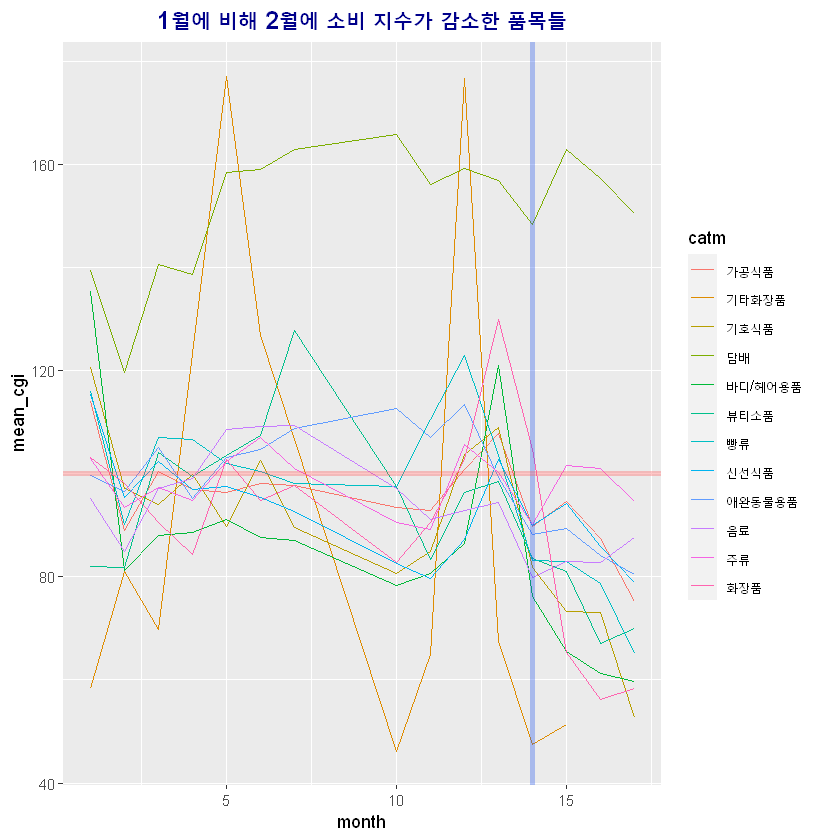

In [80]:
index_decrease <- index4 %>% filter(catm %in% decrease_list)

p23 <- ggplot(index_decrease) +
geom_line(mapping = aes(x= month, y =mean_cgi, color = catm)) +
geom_vline(xintercept=14, col = "#2255EE55", lwd = 1.5) + 
geom_hline(yintercept=100, col = "#FF555555", lwd = 1.5 ) +
ggtitle("1월에 비해 2월에 소비 지수가 감소한 품목들") +
theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 15, color = "darkblue"))
p23

* 2020년 1월에 비해 2월에 소비 지수가 증가한 품목들 중에서는 담배를 제외한 거의 모든 품목의 소비 지수가 100이하이므로 2020년 2월 이후(파란 선 오른쪽) 감소하고 있음을 확인할 수 있었습니다.
* 담배를 제외한 위의 품목들은 1월에 비해 2월에 소비지수가 더 감소했으므로 감소의 '정도'가 더 강해진 품목들이며, 화장품과 기타 화장품의 소비지수 감소 정도가 특히 심함도 확인할 수 있었습니다. 이는 사람들이 외출을 할 필요가 없어 화장을 잘 하지 않고, 나가더라도 마스크를 쓰기 때문에 마스크에 가려지는 부분은 잘 화장을 하지 않아 화장품의 소비 지수 정도가 가장 크게 감소했음을 짐작할 수 있습니다. 
* 담배의 경우, 전자 담배의 유효성에 대한 의문이 커지면서 전자담배 대신 일반 담배를 피는 사람들이 다시 늘어나기 시작함에 따라 코로나와는 별개로 지속적인 소비 지수 상승세를 보이고 있습니다. 

### 2) 2020년 2월 이후 각 품목 별 소비지수 시각화 

In [81]:
# 2020년 2,3,4,5월의 index4 데이터 
post_index <- index4 %>% filter(month == 14 | month == 15 | month == 16 | month == 17)
head(post_index)

year,month,catl,catm,mean_cgi
2020,14,건강/의료용품,건강관리용품,109.82081
2020,14,식품,가공식품,89.73764
2020,14,식품,기호식품,81.88682
2020,14,식품,담배,148.33034
2020,14,식품,빙과류,73.31151
2020,14,식품,빵류,83.20651


In [82]:
# 2019년 2,3,4,5월의 index4 데이터 
before_index <- index4 %>% filter(month == 2 | month == 3 | month == 4 | month == 5)
head(before_index)

year,month,catl,catm,mean_cgi
2019,2,건강/의료용품,건강관리용품,101.43355
2019,2,식품,가공식품,88.98846
2019,2,식품,기호식품,97.07933
2019,2,식품,담배,119.58068
2019,2,식품,빙과류,73.04530
2019,2,식품,빵류,90.09548


* 포스트 코로나 시대와 코로나 이전의 소비 지수의 전체적인 변화가 있었는지 알아보기 위해 2019년과 2020년의 각 2~5월의 소비 지수의 평균을 구해 보았습니다. 

In [83]:
post_index_catm <- post_index %>% group_by(catm) %>% summarize(mean_cgi_by_catm = mean(mean_cgi)) %>% arrange(catm)
before_index_catm <- before_index %>% group_by(catm) %>% summarize(mean_cgi_by_catm = mean(mean_cgi)) %>% arrange(catm)

In [84]:
# 포스트 코로나 시대 2월~5월의 각 품목 별 평균 cgi 
post_index_catm$mean_cgi_by_catm <- post_index_catm$mean_cgi_by_catm
post_index_catm

catm,mean_cgi_by_catm
가공식품,86.80404
건강관리용품,95.61056
기타화장품,49.43705
기호식품,70.25402
담배,154.76121
바디/헤어용품,65.63579
뷰티소품,75.39287
빙과류,79.39832
빵류,77.52780
생활용품,78.73119


In [85]:
# 2019년 2월~5월의 각 품목 별 평균 cgi 
before_index_catm$mean_cgi_by_catm <- before_index_catm$mean_cgi_by_catm
before_index_catm

catm,mean_cgi_by_catm
가공식품,95.69814
건강관리용품,103.82130
기타화장품,112.80415
기호식품,95.21193
담배,139.29841
바디/헤어용품,87.27054
뷰티소품,97.23577
빙과류,88.15268
빵류,101.43751
생활용품,98.63397


In [86]:
# 2020년과 2019년의 cgi(소비지수) 각 품목 별 비율을 구하기 위해 두 데이터 merge
all_index_catm <- inner_join(before_index_catm, post_index_catm, by = "catm")
colnames(all_index_catm) <- c("catm","before_cgi", "post_cgi")
all_index_catm 

catm,before_cgi,post_cgi
가공식품,95.69814,86.80404
건강관리용품,103.82130,95.61056
기타화장품,112.80415,49.43705
기호식품,95.21193,70.25402
담배,139.29841,154.76121
바디/헤어용품,87.27054,65.63579
뷰티소품,97.23577,75.39287
빙과류,88.15268,79.39832
빵류,101.43751,77.52780
생활용품,98.63397,78.73119


In [87]:
# 2020년과 2019년의 cgi(소비지수) 각 품목 별 비율
all_index_catm2 <- all_index_catm %>% mutate(rate_cgi = post_cgi/before_cgi) %>% arrange(rate_cgi)
all_index_catm2$rate_cgi <-  all_index_catm2$rate_cgi
all_index_catm2

catm,before_cgi,post_cgi,rate_cgi
기타화장품,112.80415,49.43705,0.4382556
기호식품,95.21193,70.25402,0.7378699
바디/헤어용품,87.27054,65.63579,0.7520956
화장품,93.94495,71.15761,0.7574394
빵류,101.43751,77.52780,0.7642912
뷰티소품,97.23577,75.39287,0.7753615
생활용품,98.63397,78.73119,0.7982158
음료,97.45715,83.29230,0.8546555
애완동물용품,100.05873,85.55440,0.8550419
제과류,103.67792,91.53174,0.8828470


In [88]:
# catm데이터 타입을 factor 형으로 바꿈
all_index_catm2$catm <- factor(all_index_catm2$catm, levels =all_index_catm2$catm)

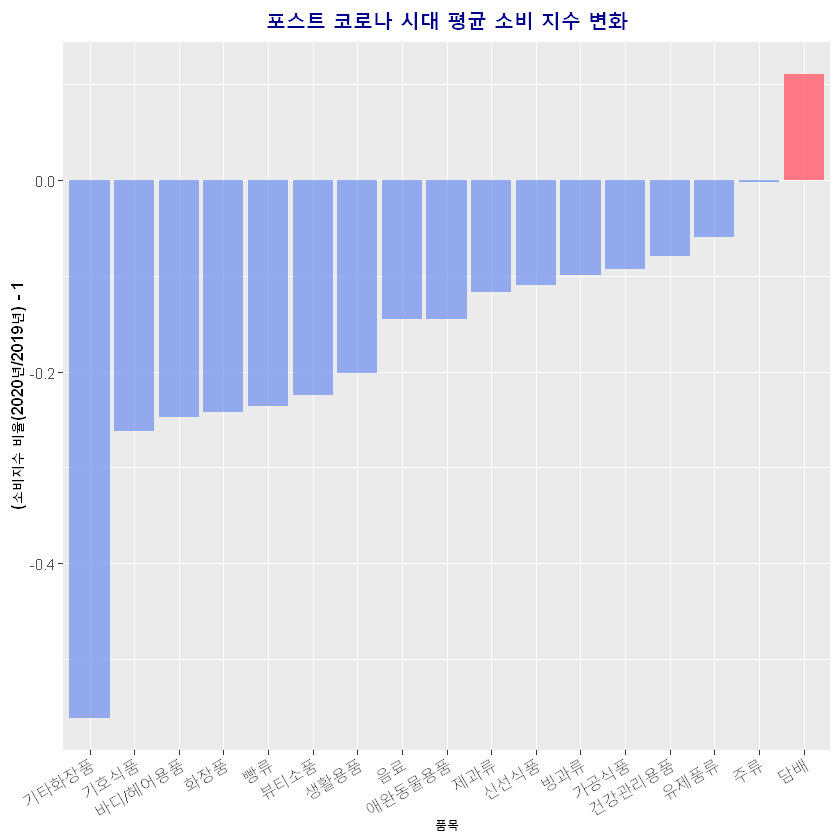

In [89]:
# 비율이 1이하인 것은 파란 색, 1 이상인 것은 빨간 색
col <- ifelse(all_index_catm2$rate_cgi  < 1, '#6688EEAA', '#FF6677DD')

# 뚜렷한 비교를 위해 y축을 rate 대신, rate-1의 값을 사용하여 그래프를 그림 
# 1보다 큼 = 2019년 대비 2020년의 소비 지수가 증가함
# 1보다 작음  = 2019년 대비 2020년의 소비 지수가 감소함 

p24 <- ggplot(all_index_catm2) +
geom_bar(mapping = aes(x=catm, y = rate_cgi-1), stat = "identity", fill = col) +
theme(axis.title = element_text(face = "bold", size = 10)) +
labs(x="품목", y="(소비지수 비율(2020년/2019년) - 1") +
theme(axis.text.x = element_text( angle = 30, hjust = 1)) +
ggtitle("포스트 코로나 시대 평균 소비 지수 변화") +
theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 15, color = "darkblue"))
p24

* 2019년 대비 2020년에는 담배를 제외한 거의 모든 품목의 소비 지수가 감소했음을 확인할 수 있다. 즉 포스트 코로나 시대의 소비가 감소했음을 뜻한다.
* 2019년 대비 2020년의 소비 지수가 특히 감소한 항목들을 살펴보면
* 1) 미용 관련: 기타 화장품, 바디/헤어 용품, 화장품, 뷰티 소품
* 2) 음식 관련: 기호 식품, 빵류, 음료, 제과류
* 등이 있다. 외출이 줄어들면서 뷰티와 군것질 등과 관련된 지출이 감소했음을 알 수 있다. 특이한 점은, 주류는 감소의 정도가 가장 적었다. 코로나가 끼친 영향이 가장 컸던 2월에는 일시적으로 2019년에 비해 주류의 소비 지수가 감소한 것이 사실이나, 2,3,4,5 월 전체적인 평균을 구해 보면, 주류의 소비 지수가 1년 전에 비해 포스트 코로나 시대에 크게 감소하지는 않은 것이다. 이는 사회적 거리두기 대신 사람들이 '부분적','선택적' 사회적 거리두기를 하고 있음을 뜻한다.

---

# [3] 결론

### 1) 최종 insight

* 위의 분석을 통해, 각 분야에서의 코로나 시대를 중심으로 한 사회의 소비 패턴을 파악해 보았습니다. 이를 파트 별로 정리해 보았습니다.  

[1]  집단 감염
* 집단 감염에 가장 큰 영향을 끼친 지역은 "대구"와 "수도권"이었습니다. 만약, 집단 감염이 없었더라면, 코로나 확산의 속도는 상당히 줄어들었을 것입니다. 하지만, 집단 감염을 배제한 그래프의 기울기를 보았을 때, 코로나 확산의 속도만 줄일 뿐 궁국적인 코로나의 전파를 막을 수는 없었을 것입니다. 따라서 코로나 사태가 계속될 것이라고 예측할 수 있습니다. 

[2] 배달
* 배달 데이터의 경우, 끼니를 해결하기 위한 일상적 식사 메뉴의 배달 비율이 증가했음을 확인할 수 있었습니다. 또한, 시간에 따른 배달 건수의 변화 패턴과 코로나 확진자 수의 변화 패턴은 양의 상관관계를 보였습니다. 마지막으로, 배달에 걸리는 시간이 포스트 코로나 시대에 지속적으로 감소하고 있습니다. 이는 사회적 거리두기의 영향으로 사람들이 외출을 자제하여 배달이 일상적인 문화로 자리잡았음을 시사합니다. 

[3] 카드 사용
* 카드 데이터를 분석한 결과, 전체적인 품목들의 2월의 카드 사용이 1월에 비해 급격하게 감소하였습니다. 이는 코로나 19 바이러스에 의해 미래에 대한 불확실성이 생겨 사람들이 카드 사용을 다소 자제하였기 때문이라고 볼 수 있습니다. 생활권 별로 나누어서 살펴보아도, 대략적인 그래프의 방향성이 비슷하였습니다. 이를 통해 사회 계층에 상관 없이 코로나의 영향을 받았음을 알 수 있었습니다. 

[4] 소비 지수 
* 소비 지수의 경우, 코로나의 영향이 가장 강해진 2월을 기점으로 뚜렷하게 소비 지수가 감소했음을 거의 모든 품목에서 확인할 수 있었습니다. 이는 전체적인 경제가 침체되고 있음을 시사합니다.

### 2) 한계점 및 보완점 제시 

[1] 한계점
* 집단 감염의 시발점이라고 할 수 있는 대구 지역의 데이터가 중도절단 되어있어, 정확한 소비 문화의 변화에 대해 파악하는 데에 한계가 있었습니다. 

[2] 보완점
* 코로나의 영향이 장기적일 것이라고 전망되고 있습니다. 코로나 집단 감염을 예방하고 현 상황에 맞는 정책을 수립하기 위해서는 철저한 자료 조사와 이를 활용한 데이터 분석이 뒷받침되어야 할 것입니다. 